### Part 1 ‐ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand,such as daily cycles. If there are data quality issues, please report them.

In [1567]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from library.sb_utils import save_file
from datetime import datetime as dt
%matplotlib inline
plt.style.use('seaborn')

In [1568]:
logins = "logins.json"

In [1569]:
# Opening JSON file
f = open(logins)
 
data = json.loads(f.read())
# Iterating through the json
# list after checking the key of the data which is login_time
for i in data['login_time']:
    print(i)
 
# Closing file
f.close()

1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21
1970-01-01 20:21:41
1970-01-01 20:12:16
1970-01-01 20:35:47
1970-01-01 20:35:38
1970-01-01 20:47:52
1970-01-01 20:26:05
1970-01-01 20:31:03
1970-01-01 20:34:46
1970-01-01 20:36:34
1970-01-01 20:39:25
1970-01-01 20:40:37
1970-01-01 20:34:58
1970-01-01 20:43:59
1970-01-01 20:47:46
1970-01-01 20:46:34
1970-01-01 20:56:07
1970-01-01 20:49:12
1970-01-01 20:59:06
1970-01-01 20:59:59
1970-01-01 21:15:01
1970-01-01 21:09:24
1970-01-01 21:19:24
1970-01-01 21:20:53
1970-01-01 21:29:19
1970-01-01 21:58:05
1970-01-01 21:51:51
1970-01-01 21:59:40
1970-01-01 22:08:34
1970-01-01 22:02:51
1970-01-01 21:58:32
1970-01-01 22:02:31
1970-01-01 22:05:32
1970-01-01 22:02:46
1970-01-01 22:10:28
1970-01-01 22:11:58
1970-01-01 22:01:05
1970-01-01 22:19:10
1970-01-01 22:16:54
1970-01-01 22:17:32
1970-01-01 22:12:05
1970-01-01 22:23:03
1970-01-01 22:22:14
1970-01-01 22:25:09
1970-01-01 22:24:04
1970-01-01 22:19:59


1970-01-04 03:51:49
1970-01-04 03:57:59
1970-01-04 04:04:26
1970-01-04 04:12:11
1970-01-04 04:10:40
1970-01-04 04:04:33
1970-01-04 04:04:40
1970-01-04 03:57:02
1970-01-04 04:04:55
1970-01-04 04:05:18
1970-01-04 04:06:55
1970-01-04 04:09:39
1970-01-04 04:06:40
1970-01-04 04:08:19
1970-01-04 04:01:50
1970-01-04 04:16:14
1970-01-04 04:12:29
1970-01-04 04:15:22
1970-01-04 04:05:26
1970-01-04 04:18:55
1970-01-04 04:14:58
1970-01-04 04:24:07
1970-01-04 04:17:34
1970-01-04 04:11:29
1970-01-04 04:11:55
1970-01-04 04:27:56
1970-01-04 04:12:32
1970-01-04 04:15:04
1970-01-04 04:11:07
1970-01-04 04:14:18
1970-01-04 04:27:13
1970-01-04 04:28:54
1970-01-04 04:25:44
1970-01-04 04:27:59
1970-01-04 04:25:59
1970-01-04 04:31:58
1970-01-04 04:29:11
1970-01-04 04:34:04
1970-01-04 04:40:09
1970-01-04 04:40:48
1970-01-04 04:31:46
1970-01-04 04:35:55
1970-01-04 04:39:45
1970-01-04 04:38:24
1970-01-04 04:48:15
1970-01-04 04:38:15
1970-01-04 04:40:15
1970-01-04 04:48:41
1970-01-04 04:42:08
1970-01-04 04:47:16


1970-01-05 00:44:02
1970-01-05 00:48:31
1970-01-05 00:46:02
1970-01-05 01:00:26
1970-01-05 00:57:50
1970-01-05 00:56:28
1970-01-05 01:10:10
1970-01-05 01:11:06
1970-01-05 01:05:21
1970-01-05 01:14:50
1970-01-05 01:12:39
1970-01-05 01:22:38
1970-01-05 01:13:26
1970-01-05 01:22:25
1970-01-05 01:24:14
1970-01-05 01:30:50
1970-01-05 01:25:09
1970-01-05 01:25:04
1970-01-05 01:32:15
1970-01-05 01:37:11
1970-01-05 01:43:39
1970-01-05 01:35:22
1970-01-05 01:37:38
1970-01-05 01:48:19
1970-01-05 01:42:59
1970-01-05 01:52:20
1970-01-05 01:59:36
1970-01-05 01:47:21
1970-01-05 01:50:47
1970-01-05 02:03:16
1970-01-05 02:06:16
1970-01-05 02:11:44
1970-01-05 02:12:26
1970-01-05 02:13:43
1970-01-05 02:19:19
1970-01-05 02:40:35
1970-01-05 02:51:06
1970-01-05 03:05:00
1970-01-05 02:55:23
1970-01-05 02:59:17
1970-01-05 03:03:38
1970-01-05 02:56:05
1970-01-05 03:12:31
1970-01-05 03:21:36
1970-01-05 03:28:26
1970-01-05 03:38:12
1970-01-05 03:55:23
1970-01-05 03:41:52
1970-01-05 03:48:43
1970-01-05 03:48:21


1970-01-07 21:16:29
1970-01-07 21:20:02
1970-01-07 21:31:49
1970-01-07 21:38:35
1970-01-07 21:24:39
1970-01-07 21:21:25
1970-01-07 21:27:38
1970-01-07 21:29:56
1970-01-07 21:33:35
1970-01-07 21:42:44
1970-01-07 21:39:16
1970-01-07 21:24:02
1970-01-07 21:31:17
1970-01-07 21:33:15
1970-01-07 21:51:19
1970-01-07 21:48:50
1970-01-07 21:50:04
1970-01-07 21:50:25
1970-01-07 21:49:22
1970-01-07 21:50:51
1970-01-07 21:57:04
1970-01-07 21:49:07
1970-01-07 21:50:04
1970-01-07 21:57:17
1970-01-07 21:54:13
1970-01-07 21:57:57
1970-01-07 21:59:35
1970-01-07 22:17:06
1970-01-07 22:03:32
1970-01-07 22:00:54
1970-01-07 22:07:24
1970-01-07 22:07:18
1970-01-07 22:00:42
1970-01-07 22:05:45
1970-01-07 22:07:46
1970-01-07 22:07:52
1970-01-07 22:14:25
1970-01-07 22:17:28
1970-01-07 22:12:44
1970-01-07 22:08:52
1970-01-07 22:19:56
1970-01-07 22:20:58
1970-01-07 22:13:43
1970-01-07 22:07:31
1970-01-07 22:15:46
1970-01-07 22:14:50
1970-01-07 22:26:12
1970-01-07 22:17:42
1970-01-07 22:10:43
1970-01-07 22:17:26


1970-01-08 22:36:29
1970-01-08 22:44:48
1970-01-08 22:47:06
1970-01-08 22:46:13
1970-01-08 22:54:43
1970-01-08 22:45:48
1970-01-08 22:48:45
1970-01-08 22:50:50
1970-01-08 22:44:07
1970-01-08 22:49:09
1970-01-08 22:54:44
1970-01-08 22:46:29
1970-01-08 22:59:00
1970-01-08 22:50:28
1970-01-08 22:58:21
1970-01-08 23:01:27
1970-01-08 22:52:13
1970-01-08 23:00:58
1970-01-08 22:57:37
1970-01-08 22:56:17
1970-01-08 23:01:27
1970-01-08 23:10:15
1970-01-08 23:03:26
1970-01-08 22:55:52
1970-01-08 23:02:09
1970-01-08 22:52:43
1970-01-08 23:02:29
1970-01-08 23:06:41
1970-01-08 22:59:20
1970-01-08 23:00:28
1970-01-08 23:12:09
1970-01-08 23:19:26
1970-01-08 23:11:38
1970-01-08 23:14:13
1970-01-08 23:08:44
1970-01-08 23:11:42
1970-01-08 23:12:30
1970-01-08 23:09:54
1970-01-08 23:06:49
1970-01-08 23:26:30
1970-01-08 23:14:16
1970-01-08 23:07:21
1970-01-08 23:10:28
1970-01-08 23:24:48
1970-01-08 23:25:25
1970-01-08 23:27:50
1970-01-08 23:22:56
1970-01-08 23:16:09
1970-01-08 23:28:20
1970-01-08 23:33:37


1970-01-10 18:21:27
1970-01-10 18:26:43
1970-01-10 18:33:41
1970-01-10 18:30:24
1970-01-10 18:17:25
1970-01-10 18:34:27
1970-01-10 18:35:32
1970-01-10 18:23:41
1970-01-10 18:33:55
1970-01-10 18:28:13
1970-01-10 18:27:10
1970-01-10 18:36:13
1970-01-10 18:39:04
1970-01-10 18:51:32
1970-01-10 18:50:31
1970-01-10 18:46:20
1970-01-10 18:45:07
1970-01-10 19:04:37
1970-01-10 19:00:04
1970-01-10 18:58:46
1970-01-10 18:55:06
1970-01-10 19:15:09
1970-01-10 19:11:16
1970-01-10 19:19:48
1970-01-10 19:16:04
1970-01-10 19:10:29
1970-01-10 19:04:33
1970-01-10 19:11:36
1970-01-10 19:17:31
1970-01-10 19:22:12
1970-01-10 19:18:28
1970-01-10 19:11:49
1970-01-10 19:24:49
1970-01-10 19:29:21
1970-01-10 19:27:29
1970-01-10 19:24:58
1970-01-10 19:30:40
1970-01-10 19:35:50
1970-01-10 19:31:00
1970-01-10 19:28:13
1970-01-10 19:33:29
1970-01-10 19:31:38
1970-01-10 19:34:21
1970-01-10 19:38:26
1970-01-10 19:31:59
1970-01-10 19:44:34
1970-01-10 19:29:33
1970-01-10 19:34:14
1970-01-10 19:53:47
1970-01-10 19:45:23


1970-01-11 04:51:00
1970-01-11 04:44:59
1970-01-11 04:43:20
1970-01-11 04:48:31
1970-01-11 04:47:03
1970-01-11 04:41:19
1970-01-11 04:46:11
1970-01-11 04:46:38
1970-01-11 04:42:28
1970-01-11 04:48:51
1970-01-11 04:50:13
1970-01-11 04:50:59
1970-01-11 04:55:31
1970-01-11 04:52:45
1970-01-11 05:05:46
1970-01-11 04:49:39
1970-01-11 04:42:16
1970-01-11 04:48:29
1970-01-11 04:48:53
1970-01-11 04:56:20
1970-01-11 04:49:14
1970-01-11 04:55:57
1970-01-11 04:52:32
1970-01-11 04:47:39
1970-01-11 04:54:14
1970-01-11 04:57:21
1970-01-11 04:57:17
1970-01-11 04:55:52
1970-01-11 04:56:05
1970-01-11 04:55:14
1970-01-11 04:53:47
1970-01-11 04:48:03
1970-01-11 04:51:24
1970-01-11 04:58:06
1970-01-11 04:50:09
1970-01-11 04:58:22
1970-01-11 04:53:17
1970-01-11 05:02:06
1970-01-11 05:00:10
1970-01-11 05:02:10
1970-01-11 05:04:22
1970-01-11 04:58:31
1970-01-11 04:58:24
1970-01-11 05:10:58
1970-01-11 04:56:01
1970-01-11 05:02:51
1970-01-11 05:10:32
1970-01-11 05:01:40
1970-01-11 05:07:51
1970-01-11 04:59:19


1970-01-14 12:23:43
1970-01-14 12:35:14
1970-01-14 12:35:50
1970-01-14 12:42:03
1970-01-14 12:35:45
1970-01-14 12:43:51
1970-01-14 12:46:05
1970-01-14 12:45:47
1970-01-14 12:54:46
1970-01-14 12:49:36
1970-01-14 12:40:10
1970-01-14 12:51:22
1970-01-14 12:53:25
1970-01-14 13:03:34
1970-01-14 12:51:39
1970-01-14 12:57:32
1970-01-14 13:04:07
1970-01-14 12:56:12
1970-01-14 13:04:20
1970-01-14 12:59:43
1970-01-14 13:06:48
1970-01-14 13:07:53
1970-01-14 13:11:35
1970-01-14 13:10:40
1970-01-14 13:14:05
1970-01-14 13:09:22
1970-01-14 13:09:49
1970-01-14 13:08:26
1970-01-14 13:18:42
1970-01-14 13:18:37
1970-01-14 13:16:48
1970-01-14 13:22:02
1970-01-14 13:25:41
1970-01-14 13:23:54
1970-01-14 13:25:15
1970-01-14 13:26:34
1970-01-14 13:26:28
1970-01-14 13:31:05
1970-01-14 13:41:23
1970-01-14 13:38:58
1970-01-14 13:33:50
1970-01-14 13:55:40
1970-01-14 13:38:00
1970-01-14 13:56:06
1970-01-14 13:41:35
1970-01-14 13:47:34
1970-01-14 13:59:39
1970-01-14 13:56:40
1970-01-14 13:58:02
1970-01-14 14:13:03


1970-01-15 11:15:01
1970-01-15 11:20:53
1970-01-15 11:36:51
1970-01-15 11:24:26
1970-01-15 11:22:49
1970-01-15 11:25:32
1970-01-15 11:27:39
1970-01-15 11:31:18
1970-01-15 11:34:45
1970-01-15 11:36:01
1970-01-15 11:23:15
1970-01-15 11:40:05
1970-01-15 11:46:46
1970-01-15 11:31:50
1970-01-15 11:43:10
1970-01-15 11:43:03
1970-01-15 11:51:49
1970-01-15 11:36:47
1970-01-15 11:37:23
1970-01-15 11:45:11
1970-01-15 11:38:34
1970-01-15 11:41:33
1970-01-15 11:45:31
1970-01-15 11:43:01
1970-01-15 11:44:06
1970-01-15 11:44:02
1970-01-15 11:47:33
1970-01-15 11:47:28
1970-01-15 11:41:16
1970-01-15 11:51:04
1970-01-15 11:44:58
1970-01-15 11:40:09
1970-01-15 11:44:33
1970-01-15 11:57:42
1970-01-15 11:59:41
1970-01-15 11:54:49
1970-01-15 11:57:34
1970-01-15 11:59:09
1970-01-15 12:04:20
1970-01-15 11:58:05
1970-01-15 12:03:30
1970-01-15 12:05:07
1970-01-15 11:55:31
1970-01-15 11:58:23
1970-01-15 11:58:21
1970-01-15 12:06:14
1970-01-15 12:11:58
1970-01-15 12:14:20
1970-01-15 12:14:42
1970-01-15 12:14:38


1970-01-17 18:21:39
1970-01-17 18:41:39
1970-01-17 18:35:42
1970-01-17 18:34:26
1970-01-17 18:53:47
1970-01-17 18:44:36
1970-01-17 18:45:58
1970-01-17 18:39:58
1970-01-17 18:52:46
1970-01-17 18:51:19
1970-01-17 18:55:26
1970-01-17 18:52:39
1970-01-17 18:53:15
1970-01-17 18:53:39
1970-01-17 18:52:28
1970-01-17 19:05:27
1970-01-17 19:02:37
1970-01-17 19:08:00
1970-01-17 19:07:39
1970-01-17 19:00:27
1970-01-17 19:04:09
1970-01-17 19:13:31
1970-01-17 19:17:34
1970-01-17 19:15:41
1970-01-17 19:30:21
1970-01-17 19:23:06
1970-01-17 19:20:53
1970-01-17 19:14:53
1970-01-17 19:31:53
1970-01-17 19:39:03
1970-01-17 19:34:48
1970-01-17 19:35:26
1970-01-17 19:24:59
1970-01-17 19:40:12
1970-01-17 19:34:04
1970-01-17 19:36:53
1970-01-17 19:39:31
1970-01-17 19:41:14
1970-01-17 19:54:28
1970-01-17 19:46:38
1970-01-17 19:52:15
1970-01-17 19:58:13
1970-01-17 19:47:01
1970-01-17 19:48:40
1970-01-17 19:59:33
1970-01-17 19:58:09
1970-01-17 19:54:28
1970-01-17 20:06:16
1970-01-17 19:59:50
1970-01-17 19:59:36


1970-01-18 02:47:40
1970-01-18 02:59:50
1970-01-18 02:49:22
1970-01-18 02:48:30
1970-01-18 02:47:49
1970-01-18 03:00:26
1970-01-18 03:03:16
1970-01-18 02:55:06
1970-01-18 03:05:11
1970-01-18 02:57:16
1970-01-18 03:01:55
1970-01-18 02:59:29
1970-01-18 02:57:27
1970-01-18 02:57:08
1970-01-18 03:04:17
1970-01-18 03:04:01
1970-01-18 03:03:54
1970-01-18 02:59:40
1970-01-18 03:05:33
1970-01-18 02:56:26
1970-01-18 03:05:03
1970-01-18 03:13:37
1970-01-18 03:03:00
1970-01-18 03:04:55
1970-01-18 02:55:23
1970-01-18 03:12:28
1970-01-18 03:08:41
1970-01-18 03:11:56
1970-01-18 03:03:01
1970-01-18 03:02:44
1970-01-18 03:06:31
1970-01-18 03:12:05
1970-01-18 03:06:40
1970-01-18 03:04:59
1970-01-18 03:11:34
1970-01-18 03:08:11
1970-01-18 03:18:45
1970-01-18 03:11:36
1970-01-18 03:07:12
1970-01-18 03:13:05
1970-01-18 03:11:28
1970-01-18 03:13:14
1970-01-18 03:18:17
1970-01-18 03:19:12
1970-01-18 03:15:46
1970-01-18 03:09:25
1970-01-18 03:19:47
1970-01-18 03:18:52
1970-01-18 03:17:51
1970-01-18 03:12:10


1970-01-21 12:22:54
1970-01-21 12:23:38
1970-01-21 12:34:13
1970-01-21 12:24:23
1970-01-21 12:32:27
1970-01-21 12:37:24
1970-01-21 12:39:42
1970-01-21 12:34:48
1970-01-21 12:41:16
1970-01-21 12:39:31
1970-01-21 12:47:56
1970-01-21 12:39:21
1970-01-21 12:50:19
1970-01-21 12:42:09
1970-01-21 12:34:32
1970-01-21 12:51:29
1970-01-21 12:41:00
1970-01-21 12:55:02
1970-01-21 12:46:38
1970-01-21 13:00:34
1970-01-21 12:45:45
1970-01-21 12:47:12
1970-01-21 12:51:33
1970-01-21 13:07:05
1970-01-21 13:01:12
1970-01-21 13:12:43
1970-01-21 13:08:11
1970-01-21 13:20:11
1970-01-21 13:34:33
1970-01-21 13:21:48
1970-01-21 13:25:57
1970-01-21 13:23:05
1970-01-21 13:27:52
1970-01-21 13:28:58
1970-01-21 13:25:02
1970-01-21 13:35:36
1970-01-21 13:34:21
1970-01-21 13:43:34
1970-01-21 13:52:40
1970-01-21 13:48:10
1970-01-21 14:00:40
1970-01-21 13:54:53
1970-01-21 14:01:53
1970-01-21 14:01:35
1970-01-21 14:04:53
1970-01-21 14:17:59
1970-01-21 14:15:09
1970-01-21 14:17:54
1970-01-21 14:30:05
1970-01-21 14:24:38


1970-01-22 11:40:50
1970-01-22 11:45:59
1970-01-22 11:45:29
1970-01-22 11:56:43
1970-01-22 11:52:03
1970-01-22 11:50:03
1970-01-22 11:56:04
1970-01-22 12:02:03
1970-01-22 11:59:04
1970-01-22 11:58:13
1970-01-22 11:59:11
1970-01-22 11:58:17
1970-01-22 11:57:35
1970-01-22 12:00:33
1970-01-22 12:04:49
1970-01-22 12:08:24
1970-01-22 12:08:09
1970-01-22 11:56:27
1970-01-22 11:58:41
1970-01-22 12:08:26
1970-01-22 12:05:03
1970-01-22 12:02:11
1970-01-22 12:09:47
1970-01-22 12:01:32
1970-01-22 12:06:15
1970-01-22 12:05:47
1970-01-22 12:05:16
1970-01-22 12:13:17
1970-01-22 12:06:53
1970-01-22 12:12:43
1970-01-22 12:22:39
1970-01-22 12:05:22
1970-01-22 12:15:33
1970-01-22 12:16:21
1970-01-22 12:18:43
1970-01-22 12:11:54
1970-01-22 12:18:16
1970-01-22 12:12:45
1970-01-22 12:24:20
1970-01-22 12:28:09
1970-01-22 12:36:08
1970-01-22 12:29:22
1970-01-22 12:26:52
1970-01-22 12:39:39
1970-01-22 12:27:31
1970-01-22 12:39:00
1970-01-22 12:33:21
1970-01-22 12:41:27
1970-01-22 12:36:48
1970-01-22 12:38:17


1970-01-24 21:37:10
1970-01-24 21:42:32
1970-01-24 21:35:06
1970-01-24 21:34:07
1970-01-24 21:48:20
1970-01-24 21:39:14
1970-01-24 21:47:55
1970-01-24 21:48:51
1970-01-24 21:46:51
1970-01-24 21:39:55
1970-01-24 21:52:02
1970-01-24 22:02:21
1970-01-24 21:59:37
1970-01-24 21:48:44
1970-01-24 22:06:59
1970-01-24 21:58:16
1970-01-24 21:53:12
1970-01-24 22:07:04
1970-01-24 21:58:42
1970-01-24 21:55:57
1970-01-24 22:04:50
1970-01-24 21:57:21
1970-01-24 22:01:18
1970-01-24 21:58:58
1970-01-24 22:04:36
1970-01-24 21:55:18
1970-01-24 22:10:31
1970-01-24 22:00:38
1970-01-24 22:07:41
1970-01-24 22:10:22
1970-01-24 22:08:54
1970-01-24 22:09:18
1970-01-24 22:11:36
1970-01-24 22:10:31
1970-01-24 22:15:58
1970-01-24 22:27:31
1970-01-24 22:18:37
1970-01-24 22:16:35
1970-01-24 22:28:57
1970-01-24 22:33:00
1970-01-24 22:30:13
1970-01-24 22:38:34
1970-01-24 22:37:48
1970-01-24 22:35:52
1970-01-24 22:32:40
1970-01-24 22:40:55
1970-01-24 22:36:12
1970-01-24 22:37:38
1970-01-24 22:34:31
1970-01-24 22:50:25


1970-01-25 04:38:59
1970-01-25 04:29:20
1970-01-25 04:41:37
1970-01-25 04:41:38
1970-01-25 04:45:40
1970-01-25 04:40:12
1970-01-25 04:45:39
1970-01-25 04:52:28
1970-01-25 04:55:09
1970-01-25 04:49:29
1970-01-25 04:36:20
1970-01-25 04:45:30
1970-01-25 04:43:20
1970-01-25 04:41:01
1970-01-25 04:47:17
1970-01-25 04:46:29
1970-01-25 04:48:03
1970-01-25 04:35:30
1970-01-25 04:54:22
1970-01-25 04:58:27
1970-01-25 04:46:40
1970-01-25 04:43:54
1970-01-25 04:50:46
1970-01-25 04:49:30
1970-01-25 04:49:46
1970-01-25 04:50:51
1970-01-25 04:56:09
1970-01-25 04:49:17
1970-01-25 04:59:05
1970-01-25 04:50:58
1970-01-25 04:57:45
1970-01-25 04:56:40
1970-01-25 04:59:13
1970-01-25 04:53:35
1970-01-25 04:49:24
1970-01-25 04:52:50
1970-01-25 05:00:58
1970-01-25 04:51:54
1970-01-25 04:55:58
1970-01-25 04:57:58
1970-01-25 04:55:05
1970-01-25 05:05:53
1970-01-25 05:05:33
1970-01-25 04:58:26
1970-01-25 04:59:29
1970-01-25 05:01:52
1970-01-25 05:07:19
1970-01-25 05:03:40
1970-01-25 04:59:40
1970-01-25 04:55:50


1970-01-28 18:04:26
1970-01-28 18:07:55
1970-01-28 18:16:40
1970-01-28 18:19:04
1970-01-28 18:21:11
1970-01-28 18:23:59
1970-01-28 18:30:54
1970-01-28 18:28:29
1970-01-28 18:32:57
1970-01-28 18:56:01
1970-01-28 18:46:31
1970-01-28 18:54:48
1970-01-28 19:38:23
1970-01-28 19:17:07
1970-01-28 19:28:49
1970-01-28 19:32:59
1970-01-28 19:38:18
1970-01-28 19:37:51
1970-01-28 19:39:14
1970-01-28 19:40:21
1970-01-28 19:59:32
1970-01-28 19:54:51
1970-01-28 20:10:20
1970-01-28 20:09:43
1970-01-28 20:06:59
1970-01-28 20:11:43
1970-01-28 20:21:59
1970-01-28 20:30:56
1970-01-28 20:42:52
1970-01-28 20:42:58
1970-01-28 20:42:27
1970-01-28 20:40:29
1970-01-28 20:46:04
1970-01-28 20:47:46
1970-01-28 20:42:59
1970-01-28 20:58:37
1970-01-28 20:54:34
1970-01-28 20:48:04
1970-01-28 20:52:51
1970-01-28 20:57:30
1970-01-28 20:55:39
1970-01-28 20:50:56
1970-01-28 20:59:21
1970-01-28 20:53:53
1970-01-28 21:02:37
1970-01-28 20:58:11
1970-01-28 20:55:03
1970-01-28 20:59:18
1970-01-28 20:57:32
1970-01-28 20:55:03


1970-01-29 13:06:11
1970-01-29 13:05:34
1970-01-29 13:05:22
1970-01-29 13:13:29
1970-01-29 13:14:55
1970-01-29 13:18:24
1970-01-29 13:05:34
1970-01-29 13:17:01
1970-01-29 13:22:45
1970-01-29 13:23:21
1970-01-29 13:23:47
1970-01-29 13:25:20
1970-01-29 13:21:36
1970-01-29 13:26:03
1970-01-29 13:30:33
1970-01-29 13:31:45
1970-01-29 13:28:51
1970-01-29 13:36:12
1970-01-29 13:36:45
1970-01-29 13:40:59
1970-01-29 13:31:34
1970-01-29 13:38:08
1970-01-29 13:40:29
1970-01-29 13:42:11
1970-01-29 13:49:25
1970-01-29 13:46:58
1970-01-29 13:56:13
1970-01-29 14:07:46
1970-01-29 14:11:14
1970-01-29 14:20:51
1970-01-29 14:27:20
1970-01-29 14:27:38
1970-01-29 14:17:52
1970-01-29 14:20:15
1970-01-29 14:21:41
1970-01-29 14:33:02
1970-01-29 14:29:11
1970-01-29 14:32:23
1970-01-29 14:34:25
1970-01-29 14:35:50
1970-01-29 14:37:31
1970-01-29 14:32:47
1970-01-29 14:38:28
1970-01-29 14:41:24
1970-01-29 14:36:38
1970-01-29 14:56:50
1970-01-29 14:53:22
1970-01-29 14:56:54
1970-01-29 14:54:41
1970-01-29 14:52:30


1970-02-01 02:33:57
1970-02-01 02:40:00
1970-02-01 02:42:27
1970-02-01 02:37:03
1970-02-01 02:32:24
1970-02-01 02:30:12
1970-02-01 02:34:34
1970-02-01 02:43:33
1970-02-01 02:43:10
1970-02-01 02:43:27
1970-02-01 02:32:20
1970-02-01 02:44:48
1970-02-01 02:45:12
1970-02-01 02:42:48
1970-02-01 02:45:50
1970-02-01 02:44:06
1970-02-01 02:46:25
1970-02-01 02:40:03
1970-02-01 02:42:40
1970-02-01 02:42:46
1970-02-01 02:44:27
1970-02-01 02:47:08
1970-02-01 02:42:14
1970-02-01 02:43:29
1970-02-01 02:53:43
1970-02-01 02:51:33
1970-02-01 03:04:02
1970-02-01 02:48:45
1970-02-01 02:50:00
1970-02-01 02:58:38
1970-02-01 02:50:52
1970-02-01 02:43:03
1970-02-01 02:48:27
1970-02-01 02:49:00
1970-02-01 02:54:55
1970-02-01 02:52:17
1970-02-01 02:50:52
1970-02-01 02:58:33
1970-02-01 03:01:36
1970-02-01 03:04:01
1970-02-01 03:05:53
1970-02-01 03:09:09
1970-02-01 02:56:39
1970-02-01 03:05:32
1970-02-01 03:00:40
1970-02-01 03:07:21
1970-02-01 03:07:52
1970-02-01 03:15:52
1970-02-01 03:13:49
1970-02-01 03:11:55


1970-02-01 16:19:43
1970-02-01 16:11:14
1970-02-01 16:18:59
1970-02-01 16:17:13
1970-02-01 16:16:54
1970-02-01 16:24:45
1970-02-01 16:26:47
1970-02-01 16:18:52
1970-02-01 16:16:41
1970-02-01 16:21:52
1970-02-01 16:27:35
1970-02-01 16:30:37
1970-02-01 16:20:38
1970-02-01 16:28:14
1970-02-01 16:34:53
1970-02-01 16:37:14
1970-02-01 16:42:36
1970-02-01 16:35:01
1970-02-01 16:48:49
1970-02-01 16:43:07
1970-02-01 16:46:35
1970-02-01 16:44:20
1970-02-01 17:02:40
1970-02-01 17:05:21
1970-02-01 17:09:37
1970-02-01 17:24:22
1970-02-01 17:09:06
1970-02-01 17:25:26
1970-02-01 17:19:09
1970-02-01 17:20:47
1970-02-01 17:17:42
1970-02-01 17:26:13
1970-02-01 17:34:42
1970-02-01 17:29:58
1970-02-01 17:34:59
1970-02-01 17:45:28
1970-02-01 17:39:40
1970-02-01 17:50:00
1970-02-01 17:31:00
1970-02-01 17:46:14
1970-02-01 17:42:02
1970-02-01 17:41:58
1970-02-01 17:55:31
1970-02-01 17:48:44
1970-02-01 17:45:29
1970-02-01 17:42:54
1970-02-01 17:44:13
1970-02-01 18:02:42
1970-02-01 17:56:10
1970-02-01 17:52:00


1970-02-05 11:33:40
1970-02-05 11:36:24
1970-02-05 11:42:45
1970-02-05 11:33:10
1970-02-05 11:30:50
1970-02-05 11:38:28
1970-02-05 11:40:13
1970-02-05 11:39:05
1970-02-05 11:29:48
1970-02-05 11:46:27
1970-02-05 11:36:16
1970-02-05 11:46:03
1970-02-05 11:45:35
1970-02-05 11:55:21
1970-02-05 11:48:24
1970-02-05 11:43:23
1970-02-05 11:50:53
1970-02-05 11:50:55
1970-02-05 11:46:21
1970-02-05 11:47:00
1970-02-05 11:39:07
1970-02-05 11:44:46
1970-02-05 11:35:40
1970-02-05 11:42:40
1970-02-05 11:46:24
1970-02-05 11:51:59
1970-02-05 11:41:31
1970-02-05 11:47:44
1970-02-05 11:54:42
1970-02-05 11:51:24
1970-02-05 11:45:28
1970-02-05 11:53:50
1970-02-05 11:49:10
1970-02-05 11:52:51
1970-02-05 11:55:01
1970-02-05 11:51:34
1970-02-05 11:54:10
1970-02-05 11:54:07
1970-02-05 12:00:56
1970-02-05 12:03:28
1970-02-05 12:08:30
1970-02-05 12:05:11
1970-02-05 12:09:58
1970-02-05 12:12:08
1970-02-05 12:22:50
1970-02-05 12:03:30
1970-02-05 11:56:28
1970-02-05 12:17:00
1970-02-05 12:10:36
1970-02-05 12:15:50


1970-02-06 00:59:29
1970-02-06 00:57:52
1970-02-06 01:04:38
1970-02-06 01:12:27
1970-02-06 00:58:06
1970-02-06 01:13:20
1970-02-06 01:14:59
1970-02-06 01:02:28
1970-02-06 00:56:26
1970-02-06 01:08:18
1970-02-06 01:08:50
1970-02-06 01:08:35
1970-02-06 01:12:36
1970-02-06 01:15:25
1970-02-06 01:16:21
1970-02-06 01:17:20
1970-02-06 01:19:16
1970-02-06 01:15:25
1970-02-06 01:23:46
1970-02-06 01:14:43
1970-02-06 01:30:19
1970-02-06 01:15:32
1970-02-06 01:15:05
1970-02-06 01:27:01
1970-02-06 01:28:29
1970-02-06 01:23:20
1970-02-06 01:31:12
1970-02-06 01:29:23
1970-02-06 01:28:01
1970-02-06 01:34:59
1970-02-06 01:33:29
1970-02-06 01:37:22
1970-02-06 01:43:12
1970-02-06 01:42:26
1970-02-06 01:42:55
1970-02-06 01:49:13
1970-02-06 01:45:13
1970-02-06 01:45:39
1970-02-06 01:52:02
1970-02-06 01:50:34
1970-02-06 01:49:31
1970-02-06 01:49:33
1970-02-06 01:59:32
1970-02-06 02:01:57
1970-02-06 01:56:14
1970-02-06 02:00:13
1970-02-06 02:05:25
1970-02-06 02:09:24
1970-02-06 02:11:00
1970-02-06 02:10:10


1970-02-07 23:27:37
1970-02-07 23:32:32
1970-02-07 23:32:54
1970-02-07 23:32:16
1970-02-07 23:21:40
1970-02-07 23:32:24
1970-02-07 23:36:42
1970-02-07 23:22:51
1970-02-07 23:32:06
1970-02-07 23:32:20
1970-02-07 23:28:55
1970-02-07 23:33:55
1970-02-07 23:38:33
1970-02-07 23:39:11
1970-02-07 23:31:54
1970-02-07 23:32:08
1970-02-07 23:47:17
1970-02-07 23:41:35
1970-02-07 23:43:50
1970-02-07 23:42:41
1970-02-07 23:42:08
1970-02-07 23:42:19
1970-02-07 23:42:25
1970-02-07 23:42:03
1970-02-07 23:51:59
1970-02-07 23:45:29
1970-02-07 23:44:09
1970-02-07 23:59:03
1970-02-07 23:50:59
1970-02-07 23:53:13
1970-02-07 23:53:14
1970-02-07 23:53:02
1970-02-07 23:55:01
1970-02-07 23:54:16
1970-02-08 00:02:50
1970-02-07 23:58:27
1970-02-07 23:53:35
1970-02-08 00:04:38
1970-02-08 00:01:21
1970-02-08 00:11:33
1970-02-08 00:02:21
1970-02-07 23:57:18
1970-02-08 00:06:51
1970-02-08 00:06:42
1970-02-08 00:09:33
1970-02-08 00:08:21
1970-02-08 00:02:47
1970-02-08 00:13:10
1970-02-08 00:01:40
1970-02-08 00:16:22


1970-02-08 04:45:58
1970-02-08 04:41:18
1970-02-08 04:50:39
1970-02-08 04:38:42
1970-02-08 04:44:21
1970-02-08 04:51:25
1970-02-08 04:43:35
1970-02-08 04:42:06
1970-02-08 04:45:15
1970-02-08 04:45:05
1970-02-08 04:47:43
1970-02-08 04:48:18
1970-02-08 04:36:04
1970-02-08 04:47:40
1970-02-08 04:46:52
1970-02-08 04:40:28
1970-02-08 04:45:13
1970-02-08 04:48:26
1970-02-08 04:51:11
1970-02-08 04:39:48
1970-02-08 04:44:14
1970-02-08 04:47:48
1970-02-08 04:44:23
1970-02-08 04:53:08
1970-02-08 04:51:50
1970-02-08 04:47:03
1970-02-08 04:51:20
1970-02-08 04:52:31
1970-02-08 04:56:54
1970-02-08 04:49:14
1970-02-08 04:50:51
1970-02-08 04:50:37
1970-02-08 04:57:50
1970-02-08 04:50:12
1970-02-08 04:57:51
1970-02-08 05:03:28
1970-02-08 04:55:44
1970-02-08 05:09:45
1970-02-08 05:00:27
1970-02-08 04:56:43
1970-02-08 04:57:01
1970-02-08 04:48:21
1970-02-08 04:54:47
1970-02-08 04:53:54
1970-02-08 04:55:50
1970-02-08 05:00:09
1970-02-08 04:55:36
1970-02-08 04:51:08
1970-02-08 05:01:17
1970-02-08 04:53:31


1970-02-11 01:35:23
1970-02-11 01:36:10
1970-02-11 01:40:12
1970-02-11 01:34:21
1970-02-11 01:35:02
1970-02-11 01:44:01
1970-02-11 01:50:17
1970-02-11 01:45:28
1970-02-11 01:36:33
1970-02-11 01:53:22
1970-02-11 01:51:38
1970-02-11 01:59:34
1970-02-11 02:03:51
1970-02-11 02:04:21
1970-02-11 02:03:47
1970-02-11 02:09:08
1970-02-11 02:14:07
1970-02-11 01:57:07
1970-02-11 02:12:36
1970-02-11 02:15:38
1970-02-11 02:23:28
1970-02-11 02:13:58
1970-02-11 02:14:45
1970-02-11 02:25:51
1970-02-11 02:08:43
1970-02-11 02:14:25
1970-02-11 02:16:32
1970-02-11 02:30:49
1970-02-11 02:31:39
1970-02-11 02:44:18
1970-02-11 02:31:26
1970-02-11 02:28:25
1970-02-11 02:43:03
1970-02-11 02:41:32
1970-02-11 02:41:17
1970-02-11 02:44:20
1970-02-11 02:54:32
1970-02-11 02:52:56
1970-02-11 02:58:00
1970-02-11 02:56:51
1970-02-11 02:56:56
1970-02-11 02:59:17
1970-02-11 03:07:35
1970-02-11 03:17:28
1970-02-11 03:09:14
1970-02-11 03:15:55
1970-02-11 03:32:58
1970-02-11 03:20:45
1970-02-11 03:18:54
1970-02-11 03:30:08


1970-02-11 21:23:40
1970-02-11 21:35:00
1970-02-11 21:40:37
1970-02-11 21:39:14
1970-02-11 21:45:07
1970-02-11 21:47:17
1970-02-11 21:25:44
1970-02-11 21:40:53
1970-02-11 21:30:41
1970-02-11 21:46:31
1970-02-11 21:44:08
1970-02-11 21:44:37
1970-02-11 21:38:21
1970-02-11 21:42:41
1970-02-11 21:42:36
1970-02-11 21:59:41
1970-02-11 22:02:49
1970-02-11 22:00:20
1970-02-11 21:53:19
1970-02-11 22:01:46
1970-02-11 22:06:20
1970-02-11 22:03:46
1970-02-11 22:03:45
1970-02-11 22:02:52
1970-02-11 22:11:04
1970-02-11 21:56:09
1970-02-11 22:18:25
1970-02-11 22:03:47
1970-02-11 22:12:02
1970-02-11 22:02:53
1970-02-11 22:12:40
1970-02-11 22:12:21
1970-02-11 22:15:39
1970-02-11 22:18:59
1970-02-11 22:07:06
1970-02-11 22:15:04
1970-02-11 22:30:10
1970-02-11 22:21:07
1970-02-11 22:09:40
1970-02-11 22:16:17
1970-02-11 22:19:27
1970-02-11 22:20:33
1970-02-11 22:17:04
1970-02-11 22:23:25
1970-02-11 22:27:26
1970-02-11 22:26:45
1970-02-11 22:30:44
1970-02-11 22:29:56
1970-02-11 22:28:13
1970-02-11 22:28:45


1970-02-14 01:31:10
1970-02-14 01:20:06
1970-02-14 01:27:22
1970-02-14 01:29:25
1970-02-14 01:17:35
1970-02-14 01:32:47
1970-02-14 01:21:29
1970-02-14 01:28:36
1970-02-14 01:25:15
1970-02-14 01:26:54
1970-02-14 01:29:12
1970-02-14 01:23:55
1970-02-14 01:28:21
1970-02-14 01:34:47
1970-02-14 01:33:40
1970-02-14 01:31:03
1970-02-14 01:34:47
1970-02-14 01:28:46
1970-02-14 01:37:21
1970-02-14 01:21:49
1970-02-14 01:28:53
1970-02-14 01:31:17
1970-02-14 01:41:01
1970-02-14 01:30:12
1970-02-14 01:31:46
1970-02-14 01:34:17
1970-02-14 01:28:02
1970-02-14 01:40:39
1970-02-14 01:39:00
1970-02-14 01:40:25
1970-02-14 01:38:30
1970-02-14 01:39:31
1970-02-14 01:37:08
1970-02-14 01:41:03
1970-02-14 01:45:07
1970-02-14 01:40:38
1970-02-14 01:42:29
1970-02-14 01:49:55
1970-02-14 01:36:08
1970-02-14 01:38:08
1970-02-14 01:46:58
1970-02-14 01:49:39
1970-02-14 01:44:43
1970-02-14 01:50:47
1970-02-14 01:47:47
1970-02-14 01:52:38
1970-02-14 01:53:45
1970-02-14 01:46:14
1970-02-14 01:57:44
1970-02-14 01:50:23


1970-02-14 11:34:20
1970-02-14 11:34:01
1970-02-14 11:30:14
1970-02-14 11:34:30
1970-02-14 11:30:50
1970-02-14 11:47:49
1970-02-14 11:45:21
1970-02-14 11:48:08
1970-02-14 11:42:32
1970-02-14 11:54:23
1970-02-14 11:51:43
1970-02-14 11:57:52
1970-02-14 11:54:24
1970-02-14 11:55:58
1970-02-14 11:52:39
1970-02-14 12:07:12
1970-02-14 12:03:22
1970-02-14 12:13:01
1970-02-14 11:55:00
1970-02-14 12:06:08
1970-02-14 12:16:54
1970-02-14 12:21:46
1970-02-14 12:25:09
1970-02-14 12:24:09
1970-02-14 12:32:58
1970-02-14 12:26:38
1970-02-14 12:26:44
1970-02-14 12:33:55
1970-02-14 12:46:30
1970-02-14 12:47:06
1970-02-14 12:40:22
1970-02-14 12:40:53
1970-02-14 12:49:50
1970-02-14 12:36:34
1970-02-14 12:53:31
1970-02-14 12:50:03
1970-02-14 12:52:50
1970-02-14 12:52:30
1970-02-14 12:58:22
1970-02-14 12:47:50
1970-02-14 12:50:59
1970-02-14 12:52:37
1970-02-14 12:57:12
1970-02-14 13:02:18
1970-02-14 12:45:42
1970-02-14 12:54:24
1970-02-14 12:58:59
1970-02-14 13:02:40
1970-02-14 13:06:39
1970-02-14 13:04:13


1970-02-16 13:09:55
1970-02-16 13:16:19
1970-02-16 13:20:51
1970-02-16 13:22:11
1970-02-16 13:25:01
1970-02-16 13:26:09
1970-02-16 13:19:24
1970-02-16 13:21:01
1970-02-16 13:15:07
1970-02-16 13:22:07
1970-02-16 13:33:22
1970-02-16 13:28:13
1970-02-16 13:35:36
1970-02-16 13:29:59
1970-02-16 13:38:20
1970-02-16 13:30:27
1970-02-16 13:30:37
1970-02-16 13:32:29
1970-02-16 13:44:35
1970-02-16 13:42:33
1970-02-16 13:47:23
1970-02-16 13:44:50
1970-02-16 13:45:02
1970-02-16 13:49:34
1970-02-16 13:53:17
1970-02-16 13:55:54
1970-02-16 13:57:55
1970-02-16 14:06:55
1970-02-16 14:06:39
1970-02-16 14:08:10
1970-02-16 14:08:51
1970-02-16 14:04:12
1970-02-16 14:19:45
1970-02-16 14:12:03
1970-02-16 14:19:34
1970-02-16 14:22:38
1970-02-16 14:25:56
1970-02-16 14:29:22
1970-02-16 14:29:04
1970-02-16 14:22:43
1970-02-16 14:33:19
1970-02-16 14:35:00
1970-02-16 14:38:08
1970-02-16 14:51:42
1970-02-16 14:46:38
1970-02-16 14:42:54
1970-02-16 14:51:22
1970-02-16 14:49:26
1970-02-16 14:45:23
1970-02-16 14:49:40


1970-02-17 10:56:50
1970-02-17 10:50:40
1970-02-17 10:39:27
1970-02-17 10:50:12
1970-02-17 10:41:15
1970-02-17 10:58:23
1970-02-17 10:57:59
1970-02-17 10:55:10
1970-02-17 10:55:44
1970-02-17 10:55:09
1970-02-17 10:45:22
1970-02-17 10:56:11
1970-02-17 10:54:30
1970-02-17 11:04:20
1970-02-17 10:48:34
1970-02-17 10:53:29
1970-02-17 11:01:37
1970-02-17 10:57:55
1970-02-17 11:06:17
1970-02-17 11:00:04
1970-02-17 11:01:52
1970-02-17 10:56:35
1970-02-17 11:06:35
1970-02-17 11:10:48
1970-02-17 11:10:24
1970-02-17 11:01:44
1970-02-17 11:08:57
1970-02-17 11:15:41
1970-02-17 11:08:15
1970-02-17 11:09:09
1970-02-17 11:19:59
1970-02-17 11:19:45
1970-02-17 11:20:52
1970-02-17 11:15:44
1970-02-17 11:28:54
1970-02-17 11:35:20
1970-02-17 11:19:51
1970-02-17 11:36:19
1970-02-17 11:21:14
1970-02-17 11:24:41
1970-02-17 11:38:25
1970-02-17 11:27:56
1970-02-17 11:27:06
1970-02-17 11:31:35
1970-02-17 11:33:12
1970-02-17 11:28:20
1970-02-17 11:30:46
1970-02-17 11:31:31
1970-02-17 11:48:58
1970-02-17 11:39:45


1970-02-19 21:20:52
1970-02-19 21:35:06
1970-02-19 21:30:45
1970-02-19 21:23:10
1970-02-19 21:34:55
1970-02-19 21:30:51
1970-02-19 21:28:19
1970-02-19 21:35:59
1970-02-19 21:34:37
1970-02-19 21:41:36
1970-02-19 21:33:49
1970-02-19 21:39:32
1970-02-19 21:41:03
1970-02-19 21:39:40
1970-02-19 21:46:10
1970-02-19 21:39:23
1970-02-19 21:40:24
1970-02-19 21:39:58
1970-02-19 21:49:57
1970-02-19 21:58:23
1970-02-19 21:55:09
1970-02-19 21:58:16
1970-02-19 21:48:44
1970-02-19 21:52:58
1970-02-19 21:59:08
1970-02-19 21:57:52
1970-02-19 21:54:38
1970-02-19 21:46:54
1970-02-19 21:54:30
1970-02-19 22:00:39
1970-02-19 21:55:02
1970-02-19 22:01:54
1970-02-19 21:59:50
1970-02-19 22:06:28
1970-02-19 22:00:14
1970-02-19 22:04:57
1970-02-19 21:59:42
1970-02-19 22:09:08
1970-02-19 22:11:14
1970-02-19 22:08:11
1970-02-19 22:09:27
1970-02-19 21:57:27
1970-02-19 22:14:13
1970-02-19 22:11:44
1970-02-19 22:13:39
1970-02-19 21:59:17
1970-02-19 22:05:24
1970-02-19 22:15:01
1970-02-19 22:05:50
1970-02-19 22:14:24


1970-02-20 20:06:27
1970-02-20 20:18:03
1970-02-20 20:20:11
1970-02-20 20:23:10
1970-02-20 20:23:54
1970-02-20 20:19:59
1970-02-20 20:26:19
1970-02-20 20:21:23
1970-02-20 20:15:54
1970-02-20 20:29:59
1970-02-20 20:19:57
1970-02-20 20:21:46
1970-02-20 20:24:26
1970-02-20 20:18:02
1970-02-20 20:26:43
1970-02-20 20:24:04
1970-02-20 20:32:14
1970-02-20 20:36:08
1970-02-20 20:27:33
1970-02-20 20:36:51
1970-02-20 20:43:24
1970-02-20 20:35:07
1970-02-20 20:32:43
1970-02-20 20:31:57
1970-02-20 20:34:02
1970-02-20 20:46:14
1970-02-20 20:39:36
1970-02-20 20:43:59
1970-02-20 20:34:20
1970-02-20 20:46:31
1970-02-20 20:49:08
1970-02-20 20:59:30
1970-02-20 20:42:53
1970-02-20 20:49:25
1970-02-20 20:47:19
1970-02-20 20:45:35
1970-02-20 20:43:36
1970-02-20 20:49:31
1970-02-20 20:50:35
1970-02-20 20:47:45
1970-02-20 20:54:43
1970-02-20 20:43:44
1970-02-20 20:47:43
1970-02-20 20:50:39
1970-02-20 20:44:54
1970-02-20 21:00:28
1970-02-20 20:52:37
1970-02-20 20:56:46
1970-02-20 21:01:41
1970-02-20 21:02:46


1970-02-22 01:17:50
1970-02-22 01:17:39
1970-02-22 01:23:13
1970-02-22 01:21:38
1970-02-22 01:20:21
1970-02-22 01:25:10
1970-02-22 01:14:41
1970-02-22 01:16:37
1970-02-22 01:18:09
1970-02-22 01:29:10
1970-02-22 01:18:36
1970-02-22 01:22:06
1970-02-22 01:22:39
1970-02-22 01:18:02
1970-02-22 01:29:06
1970-02-22 01:18:28
1970-02-22 01:31:43
1970-02-22 01:22:34
1970-02-22 01:14:11
1970-02-22 01:22:03
1970-02-22 01:28:17
1970-02-22 01:28:14
1970-02-22 01:23:16
1970-02-22 01:26:19
1970-02-22 01:30:59
1970-02-22 01:16:09
1970-02-22 01:23:09
1970-02-22 01:29:05
1970-02-22 01:24:11
1970-02-22 01:32:02
1970-02-22 01:38:26
1970-02-22 01:24:16
1970-02-22 01:32:02
1970-02-22 01:28:09
1970-02-22 01:33:50
1970-02-22 01:33:09
1970-02-22 01:32:23
1970-02-22 01:32:38
1970-02-22 01:43:48
1970-02-22 01:43:52
1970-02-22 01:25:50
1970-02-22 01:32:16
1970-02-22 01:38:55
1970-02-22 01:40:40
1970-02-22 01:36:46
1970-02-22 01:42:40
1970-02-22 01:33:10
1970-02-22 01:49:22
1970-02-22 01:32:29
1970-02-22 01:41:14


1970-02-22 19:51:36
1970-02-22 19:50:20
1970-02-22 19:52:43
1970-02-22 19:50:35
1970-02-22 19:52:55
1970-02-22 19:58:55
1970-02-22 20:00:48
1970-02-22 19:51:02
1970-02-22 19:58:33
1970-02-22 20:00:09
1970-02-22 19:57:23
1970-02-22 20:04:19
1970-02-22 20:07:47
1970-02-22 20:00:32
1970-02-22 20:10:46
1970-02-22 20:07:52
1970-02-22 20:07:29
1970-02-22 20:10:31
1970-02-22 20:05:35
1970-02-22 20:04:31
1970-02-22 20:09:19
1970-02-22 20:14:35
1970-02-22 20:12:16
1970-02-22 20:20:00
1970-02-22 20:17:11
1970-02-22 20:21:11
1970-02-22 20:19:08
1970-02-22 20:16:54
1970-02-22 20:15:59
1970-02-22 20:15:51
1970-02-22 20:21:34
1970-02-22 20:20:41
1970-02-22 20:13:30
1970-02-22 20:14:36
1970-02-22 20:21:56
1970-02-22 20:17:11
1970-02-22 20:15:54
1970-02-22 20:18:33
1970-02-22 20:29:46
1970-02-22 20:14:47
1970-02-22 20:19:04
1970-02-22 20:27:12
1970-02-22 20:25:54
1970-02-22 20:32:07
1970-02-22 20:24:00
1970-02-22 20:33:52
1970-02-22 20:31:46
1970-02-22 20:25:44
1970-02-22 20:22:41
1970-02-22 20:26:30


1970-02-24 22:41:43
1970-02-24 22:50:37
1970-02-24 22:47:08
1970-02-24 22:52:11
1970-02-24 22:55:35
1970-02-24 22:54:50
1970-02-24 22:56:27
1970-02-24 23:00:54
1970-02-24 22:55:27
1970-02-24 23:02:58
1970-02-24 23:00:51
1970-02-24 22:54:57
1970-02-24 22:52:58
1970-02-24 22:59:41
1970-02-24 23:09:57
1970-02-24 23:06:47
1970-02-24 23:09:41
1970-02-24 23:09:57
1970-02-24 23:05:39
1970-02-24 23:17:51
1970-02-24 23:10:29
1970-02-24 23:15:16
1970-02-24 23:17:05
1970-02-24 23:09:57
1970-02-24 23:14:18
1970-02-24 23:09:51
1970-02-24 23:11:54
1970-02-24 23:13:36
1970-02-24 23:17:05
1970-02-24 23:19:06
1970-02-24 23:26:38
1970-02-24 23:22:10
1970-02-24 23:28:42
1970-02-24 23:21:56
1970-02-24 23:22:35
1970-02-24 23:22:05
1970-02-24 23:25:30
1970-02-24 23:19:23
1970-02-24 23:22:04
1970-02-24 23:28:33
1970-02-24 23:24:27
1970-02-24 23:42:46
1970-02-24 23:29:26
1970-02-24 23:28:30
1970-02-24 23:37:40
1970-02-24 23:37:31
1970-02-24 23:32:34
1970-02-24 23:37:29
1970-02-24 23:35:34
1970-02-24 23:38:37


1970-02-26 20:38:14
1970-02-26 20:32:22
1970-02-26 20:36:59
1970-02-26 20:38:57
1970-02-26 20:30:24
1970-02-26 20:39:04
1970-02-26 20:39:16
1970-02-26 20:31:59
1970-02-26 20:39:54
1970-02-26 20:32:33
1970-02-26 20:46:01
1970-02-26 20:46:33
1970-02-26 20:41:38
1970-02-26 20:38:57
1970-02-26 20:51:06
1970-02-26 20:51:42
1970-02-26 20:53:15
1970-02-26 20:53:30
1970-02-26 20:55:09
1970-02-26 20:53:49
1970-02-26 20:49:36
1970-02-26 20:54:12
1970-02-26 21:01:27
1970-02-26 21:04:34
1970-02-26 21:00:20
1970-02-26 20:56:11
1970-02-26 20:57:13
1970-02-26 21:00:31
1970-02-26 21:06:19
1970-02-26 21:05:51
1970-02-26 21:05:43
1970-02-26 21:11:20
1970-02-26 21:06:38
1970-02-26 21:13:47
1970-02-26 21:18:01
1970-02-26 21:14:46
1970-02-26 21:07:18
1970-02-26 21:13:27
1970-02-26 21:20:36
1970-02-26 21:12:27
1970-02-26 21:18:35
1970-02-26 21:11:19
1970-02-26 21:17:17
1970-02-26 21:29:38
1970-02-26 21:15:39
1970-02-26 21:16:39
1970-02-26 21:27:04
1970-02-26 21:22:03
1970-02-26 21:24:40
1970-02-26 21:12:45


1970-02-27 22:11:04
1970-02-27 22:18:58
1970-02-27 22:18:33
1970-02-27 22:16:59
1970-02-27 22:17:08
1970-02-27 22:24:06
1970-02-27 22:20:20
1970-02-27 22:17:04
1970-02-27 22:17:31
1970-02-27 22:30:17
1970-02-27 22:20:11
1970-02-27 22:20:09
1970-02-27 22:19:19
1970-02-27 22:20:03
1970-02-27 22:21:38
1970-02-27 22:26:26
1970-02-27 22:33:20
1970-02-27 22:21:02
1970-02-27 22:25:44
1970-02-27 22:24:30
1970-02-27 22:24:01
1970-02-27 22:30:01
1970-02-27 22:31:56
1970-02-27 22:37:25
1970-02-27 22:30:01
1970-02-27 22:30:53
1970-02-27 22:25:16
1970-02-27 22:33:42
1970-02-27 22:35:00
1970-02-27 22:23:00
1970-02-27 22:33:28
1970-02-27 22:29:41
1970-02-27 22:22:31
1970-02-27 22:29:12
1970-02-27 22:23:55
1970-02-27 22:36:59
1970-02-27 22:28:34
1970-02-27 22:33:39
1970-02-27 22:24:01
1970-02-27 22:29:39
1970-02-27 22:37:33
1970-02-27 22:27:45
1970-02-27 22:30:48
1970-02-27 22:29:01
1970-02-27 22:30:57
1970-02-27 22:37:16
1970-02-27 22:31:32
1970-02-27 22:30:12
1970-02-27 22:35:15
1970-02-27 22:32:19


1970-02-28 23:33:07
1970-02-28 23:29:57
1970-02-28 23:32:03
1970-02-28 23:29:06
1970-02-28 23:25:26
1970-02-28 23:23:49
1970-02-28 23:35:18
1970-02-28 23:32:05
1970-02-28 23:39:01
1970-02-28 23:38:54
1970-02-28 23:42:41
1970-02-28 23:26:46
1970-02-28 23:37:54
1970-02-28 23:37:32
1970-02-28 23:48:30
1970-02-28 23:45:18
1970-02-28 23:41:34
1970-02-28 23:33:41
1970-02-28 23:45:50
1970-02-28 23:44:51
1970-02-28 23:43:50
1970-02-28 23:46:46
1970-02-28 23:50:37
1970-02-28 23:47:50
1970-02-28 23:42:17
1970-02-28 23:42:26
1970-02-28 23:50:27
1970-02-28 23:51:20
1970-02-28 23:53:23
1970-02-28 23:45:30
1970-02-28 23:51:17
1970-02-28 23:54:12
1970-02-28 23:56:57
1970-02-28 23:56:24
1970-02-28 23:53:24
1970-02-28 23:59:01
1970-03-01 00:09:22
1970-02-28 23:49:30
1970-02-28 23:56:04
1970-03-01 00:03:03
1970-03-01 00:04:45
1970-03-01 00:05:47
1970-03-01 00:07:22
1970-03-01 00:13:37
1970-03-01 00:05:24
1970-03-01 00:02:31
1970-03-01 00:06:48
1970-03-01 00:11:03
1970-03-01 00:16:17
1970-03-01 00:13:33


1970-03-01 16:23:49
1970-03-01 16:26:47
1970-03-01 16:16:21
1970-03-01 16:24:05
1970-03-01 16:30:36
1970-03-01 16:29:21
1970-03-01 16:35:43
1970-03-01 16:27:34
1970-03-01 16:31:08
1970-03-01 16:28:30
1970-03-01 16:31:07
1970-03-01 16:30:12
1970-03-01 16:40:53
1970-03-01 16:36:54
1970-03-01 16:29:59
1970-03-01 16:37:12
1970-03-01 16:37:36
1970-03-01 16:38:03
1970-03-01 16:35:42
1970-03-01 16:38:02
1970-03-01 16:50:49
1970-03-01 16:55:11
1970-03-01 16:37:37
1970-03-01 16:47:32
1970-03-01 16:51:59
1970-03-01 16:51:25
1970-03-01 16:48:58
1970-03-01 16:52:21
1970-03-01 16:49:18
1970-03-01 16:47:55
1970-03-01 16:56:55
1970-03-01 17:02:16
1970-03-01 16:53:00
1970-03-01 16:54:10
1970-03-01 17:10:23
1970-03-01 16:57:37
1970-03-01 17:04:34
1970-03-01 17:14:25
1970-03-01 17:13:17
1970-03-01 17:14:10
1970-03-01 17:17:39
1970-03-01 17:22:10
1970-03-01 17:17:21
1970-03-01 17:27:13
1970-03-01 17:24:29
1970-03-01 17:20:31
1970-03-01 17:25:50
1970-03-01 17:31:35
1970-03-01 17:29:25
1970-03-01 17:33:07


1970-03-04 11:28:20
1970-03-04 11:35:51
1970-03-04 11:32:50
1970-03-04 11:36:46
1970-03-04 11:44:58
1970-03-04 11:40:58
1970-03-04 11:37:13
1970-03-04 11:39:13
1970-03-04 11:50:30
1970-03-04 11:42:17
1970-03-04 11:39:01
1970-03-04 11:37:24
1970-03-04 11:48:32
1970-03-04 11:44:54
1970-03-04 11:39:12
1970-03-04 11:46:42
1970-03-04 11:58:45
1970-03-04 11:50:03
1970-03-04 11:48:58
1970-03-04 11:52:26
1970-03-04 11:44:24
1970-03-04 11:57:20
1970-03-04 11:47:16
1970-03-04 12:01:21
1970-03-04 12:01:06
1970-03-04 11:50:38
1970-03-04 11:54:33
1970-03-04 11:47:32
1970-03-04 11:55:01
1970-03-04 11:56:33
1970-03-04 11:58:43
1970-03-04 11:55:34
1970-03-04 12:01:13
1970-03-04 11:56:40
1970-03-04 11:56:59
1970-03-04 12:04:25
1970-03-04 11:53:55
1970-03-04 12:06:42
1970-03-04 11:57:34
1970-03-04 12:03:01
1970-03-04 12:06:16
1970-03-04 12:07:25
1970-03-04 12:06:06
1970-03-04 12:08:56
1970-03-04 12:01:12
1970-03-04 12:08:08
1970-03-04 12:12:19
1970-03-04 12:06:06
1970-03-04 12:12:46
1970-03-04 12:21:37


1970-03-05 11:54:12
1970-03-05 11:45:13
1970-03-05 11:54:52
1970-03-05 12:00:03
1970-03-05 11:49:46
1970-03-05 11:55:57
1970-03-05 11:53:05
1970-03-05 12:08:33
1970-03-05 11:56:40
1970-03-05 11:51:29
1970-03-05 11:56:36
1970-03-05 11:54:11
1970-03-05 11:59:21
1970-03-05 11:51:29
1970-03-05 12:01:43
1970-03-05 11:59:50
1970-03-05 12:05:08
1970-03-05 11:57:42
1970-03-05 12:04:21
1970-03-05 12:08:06
1970-03-05 12:13:59
1970-03-05 12:15:19
1970-03-05 12:06:55
1970-03-05 12:13:58
1970-03-05 12:13:42
1970-03-05 12:14:11
1970-03-05 12:17:29
1970-03-05 12:08:32
1970-03-05 12:21:27
1970-03-05 12:25:47
1970-03-05 12:04:16
1970-03-05 12:20:30
1970-03-05 12:18:32
1970-03-05 12:24:52
1970-03-05 12:15:37
1970-03-05 12:27:04
1970-03-05 12:25:28
1970-03-05 12:23:00
1970-03-05 12:34:45
1970-03-05 12:33:55
1970-03-05 12:33:04
1970-03-05 12:35:15
1970-03-05 12:43:28
1970-03-05 12:41:03
1970-03-05 12:46:47
1970-03-05 12:36:38
1970-03-05 12:44:47
1970-03-05 12:44:26
1970-03-05 12:43:00
1970-03-05 12:49:00


1970-03-07 03:09:47
1970-03-07 03:11:33
1970-03-07 03:12:58
1970-03-07 03:15:33
1970-03-07 03:10:38
1970-03-07 03:25:36
1970-03-07 03:16:12
1970-03-07 03:14:13
1970-03-07 03:20:24
1970-03-07 03:25:00
1970-03-07 03:17:57
1970-03-07 03:17:41
1970-03-07 03:20:56
1970-03-07 03:11:50
1970-03-07 03:13:20
1970-03-07 03:17:46
1970-03-07 03:05:42
1970-03-07 03:27:10
1970-03-07 03:24:29
1970-03-07 03:19:51
1970-03-07 03:22:30
1970-03-07 03:17:30
1970-03-07 03:17:17
1970-03-07 03:17:42
1970-03-07 03:24:58
1970-03-07 03:20:35
1970-03-07 03:18:28
1970-03-07 03:20:46
1970-03-07 03:20:58
1970-03-07 03:15:43
1970-03-07 03:20:00
1970-03-07 03:20:32
1970-03-07 03:21:33
1970-03-07 03:22:59
1970-03-07 03:24:37
1970-03-07 03:31:31
1970-03-07 03:19:34
1970-03-07 03:30:30
1970-03-07 03:32:26
1970-03-07 03:27:53
1970-03-07 03:27:07
1970-03-07 03:30:24
1970-03-07 03:27:16
1970-03-07 03:24:32
1970-03-07 03:30:40
1970-03-07 03:28:56
1970-03-07 03:32:15
1970-03-07 03:31:13
1970-03-07 03:24:12
1970-03-07 03:32:05


1970-03-07 13:40:58
1970-03-07 13:42:19
1970-03-07 13:41:34
1970-03-07 13:39:27
1970-03-07 13:41:46
1970-03-07 13:51:58
1970-03-07 13:49:46
1970-03-07 13:40:38
1970-03-07 13:43:11
1970-03-07 13:54:53
1970-03-07 13:58:34
1970-03-07 13:56:48
1970-03-07 13:49:10
1970-03-07 13:51:39
1970-03-07 13:40:35
1970-03-07 13:54:05
1970-03-07 13:51:39
1970-03-07 13:53:14
1970-03-07 13:47:24
1970-03-07 13:53:32
1970-03-07 13:55:20
1970-03-07 13:58:02
1970-03-07 14:04:04
1970-03-07 13:58:27
1970-03-07 14:03:53
1970-03-07 14:01:48
1970-03-07 14:05:05
1970-03-07 13:54:33
1970-03-07 13:55:22
1970-03-07 14:02:08
1970-03-07 13:52:59
1970-03-07 14:02:43
1970-03-07 14:06:29
1970-03-07 14:03:47
1970-03-07 14:08:15
1970-03-07 14:05:42
1970-03-07 14:08:49
1970-03-07 14:06:13
1970-03-07 14:10:43
1970-03-07 14:09:51
1970-03-07 14:10:30
1970-03-07 14:16:21
1970-03-07 14:18:00
1970-03-07 14:16:46
1970-03-07 14:10:49
1970-03-07 14:14:40
1970-03-07 14:24:12
1970-03-07 14:22:08
1970-03-07 14:13:08
1970-03-07 14:11:45


1970-03-09 11:36:03
1970-03-09 11:37:28
1970-03-09 11:43:54
1970-03-09 11:47:54
1970-03-09 11:40:26
1970-03-09 11:53:59
1970-03-09 11:44:56
1970-03-09 11:53:49
1970-03-09 11:44:11
1970-03-09 11:50:42
1970-03-09 11:43:54
1970-03-09 11:45:38
1970-03-09 11:49:02
1970-03-09 11:51:06
1970-03-09 11:53:38
1970-03-09 11:50:19
1970-03-09 11:56:57
1970-03-09 11:52:57
1970-03-09 12:00:27
1970-03-09 11:58:48
1970-03-09 11:58:15
1970-03-09 12:03:00
1970-03-09 11:50:14
1970-03-09 11:54:02
1970-03-09 12:04:53
1970-03-09 12:03:26
1970-03-09 12:04:10
1970-03-09 11:59:45
1970-03-09 12:01:39
1970-03-09 12:07:30
1970-03-09 12:09:21
1970-03-09 12:12:08
1970-03-09 12:10:15
1970-03-09 12:03:11
1970-03-09 12:03:59
1970-03-09 12:19:57
1970-03-09 12:16:03
1970-03-09 12:08:09
1970-03-09 12:25:11
1970-03-09 12:15:13
1970-03-09 12:16:42
1970-03-09 12:18:41
1970-03-09 12:18:48
1970-03-09 12:20:05
1970-03-09 12:35:04
1970-03-09 12:24:44
1970-03-09 12:24:22
1970-03-09 12:28:56
1970-03-09 12:27:08
1970-03-09 12:35:51


1970-03-10 01:20:35
1970-03-10 01:34:23
1970-03-10 01:26:16
1970-03-10 01:31:05
1970-03-10 01:32:33
1970-03-10 01:28:25
1970-03-10 01:37:14
1970-03-10 01:34:34
1970-03-10 01:38:09
1970-03-10 01:40:38
1970-03-10 01:42:13
1970-03-10 01:29:51
1970-03-10 01:42:56
1970-03-10 01:48:50
1970-03-10 01:58:03
1970-03-10 01:46:38
1970-03-10 01:56:44
1970-03-10 01:53:59
1970-03-10 01:46:08
1970-03-10 01:59:08
1970-03-10 02:01:17
1970-03-10 02:09:58
1970-03-10 02:17:16
1970-03-10 02:15:37
1970-03-10 02:24:53
1970-03-10 02:17:57
1970-03-10 02:32:51
1970-03-10 02:45:22
1970-03-10 02:40:56
1970-03-10 02:46:24
1970-03-10 02:43:19
1970-03-10 02:37:49
1970-03-10 02:52:13
1970-03-10 02:49:18
1970-03-10 03:02:29
1970-03-10 02:56:13
1970-03-10 03:06:18
1970-03-10 03:03:37
1970-03-10 03:07:13
1970-03-10 03:08:48
1970-03-10 03:20:46
1970-03-10 03:31:54
1970-03-10 03:47:37
1970-03-10 03:59:59
1970-03-10 03:58:18
1970-03-10 04:24:51
1970-03-10 04:35:26
1970-03-10 04:38:35
1970-03-10 04:43:23
1970-03-10 04:43:54


1970-03-12 22:44:28
1970-03-12 22:50:40
1970-03-12 22:39:41
1970-03-12 22:40:49
1970-03-12 22:43:40
1970-03-12 22:42:34
1970-03-12 22:42:27
1970-03-12 22:44:59
1970-03-12 22:45:24
1970-03-12 22:48:40
1970-03-12 22:52:12
1970-03-12 22:50:00
1970-03-12 23:00:12
1970-03-12 22:47:07
1970-03-12 22:47:19
1970-03-12 22:54:24
1970-03-12 23:12:56
1970-03-12 22:59:08
1970-03-12 23:00:31
1970-03-12 22:57:44
1970-03-12 22:58:48
1970-03-12 23:03:45
1970-03-12 22:59:29
1970-03-12 22:58:35
1970-03-12 22:56:55
1970-03-12 23:01:36
1970-03-12 23:04:59
1970-03-12 23:01:33
1970-03-12 23:00:27
1970-03-12 22:56:15
1970-03-12 23:10:35
1970-03-12 23:11:49
1970-03-12 23:06:39
1970-03-12 23:04:38
1970-03-12 23:01:49
1970-03-12 23:15:10
1970-03-12 23:08:02
1970-03-12 23:07:02
1970-03-12 23:11:27
1970-03-12 23:16:25
1970-03-12 23:14:13
1970-03-12 23:16:45
1970-03-12 23:17:51
1970-03-12 23:25:41
1970-03-12 23:17:32
1970-03-12 23:12:41
1970-03-12 23:22:16
1970-03-12 23:21:09
1970-03-12 23:19:36
1970-03-12 23:21:47


1970-03-13 12:43:02
1970-03-13 12:33:45
1970-03-13 12:39:11
1970-03-13 12:39:34
1970-03-13 12:44:05
1970-03-13 12:45:26
1970-03-13 12:44:14
1970-03-13 12:39:43
1970-03-13 12:38:58
1970-03-13 12:52:09
1970-03-13 12:43:14
1970-03-13 12:50:32
1970-03-13 12:49:23
1970-03-13 12:39:03
1970-03-13 12:47:21
1970-03-13 12:57:42
1970-03-13 12:58:34
1970-03-13 12:51:20
1970-03-13 13:01:38
1970-03-13 13:01:56
1970-03-13 13:00:52
1970-03-13 13:08:20
1970-03-13 13:08:45
1970-03-13 13:07:35
1970-03-13 13:05:39
1970-03-13 13:21:25
1970-03-13 13:14:31
1970-03-13 13:21:33
1970-03-13 13:14:37
1970-03-13 13:13:13
1970-03-13 13:18:10
1970-03-13 13:18:01
1970-03-13 13:18:33
1970-03-13 13:20:54
1970-03-13 13:28:14
1970-03-13 13:29:07
1970-03-13 13:25:01
1970-03-13 13:16:05
1970-03-13 13:17:43
1970-03-13 13:24:54
1970-03-13 13:23:51
1970-03-13 13:31:19
1970-03-13 13:23:56
1970-03-13 13:36:57
1970-03-13 13:44:40
1970-03-13 13:39:12
1970-03-13 13:45:39
1970-03-13 13:50:01
1970-03-13 13:49:23
1970-03-13 13:36:40


1970-03-14 23:58:45
1970-03-15 00:07:21
1970-03-15 00:04:20
1970-03-15 00:11:26
1970-03-15 00:06:33
1970-03-15 00:04:11
1970-03-15 00:12:02
1970-03-15 00:07:56
1970-03-15 00:17:03
1970-03-15 00:15:10
1970-03-15 00:09:10
1970-03-15 00:01:39
1970-03-15 00:06:13
1970-03-15 00:13:06
1970-03-15 00:12:42
1970-03-15 00:21:00
1970-03-15 00:18:33
1970-03-15 00:14:47
1970-03-15 00:16:45
1970-03-15 00:21:06
1970-03-15 00:14:57
1970-03-15 00:15:51
1970-03-15 00:19:14
1970-03-15 00:17:01
1970-03-15 00:19:01
1970-03-15 00:22:13
1970-03-15 00:22:46
1970-03-15 00:23:36
1970-03-15 00:32:42
1970-03-15 00:21:28
1970-03-15 00:29:12
1970-03-15 00:15:16
1970-03-15 00:33:39
1970-03-15 00:24:24
1970-03-15 00:30:04
1970-03-15 00:32:16
1970-03-15 00:28:14
1970-03-15 00:39:01
1970-03-15 00:27:18
1970-03-15 00:39:54
1970-03-15 00:38:50
1970-03-15 00:36:16
1970-03-15 00:31:49
1970-03-15 00:34:05
1970-03-15 00:39:22
1970-03-15 00:44:15
1970-03-15 00:36:13
1970-03-15 00:41:50
1970-03-15 00:43:31
1970-03-15 00:42:15


1970-03-17 11:16:27
1970-03-17 11:14:17
1970-03-17 11:22:17
1970-03-17 11:19:31
1970-03-17 11:22:03
1970-03-17 11:09:39
1970-03-17 11:13:54
1970-03-17 11:19:34
1970-03-17 11:14:55
1970-03-17 11:17:36
1970-03-17 11:22:12
1970-03-17 11:31:36
1970-03-17 11:18:34
1970-03-17 11:23:53
1970-03-17 11:26:13
1970-03-17 11:15:20
1970-03-17 11:23:38
1970-03-17 11:23:13
1970-03-17 11:23:55
1970-03-17 11:17:48
1970-03-17 11:32:37
1970-03-17 11:42:35
1970-03-17 11:31:37
1970-03-17 11:32:04
1970-03-17 11:26:52
1970-03-17 11:30:42
1970-03-17 11:24:09
1970-03-17 11:29:04
1970-03-17 11:35:26
1970-03-17 11:33:27
1970-03-17 11:40:36
1970-03-17 11:33:17
1970-03-17 11:47:36
1970-03-17 11:28:12
1970-03-17 11:25:36
1970-03-17 11:34:40
1970-03-17 11:33:28
1970-03-17 11:29:24
1970-03-17 11:33:03
1970-03-17 11:33:43
1970-03-17 11:30:23
1970-03-17 11:33:06
1970-03-17 11:41:40
1970-03-17 11:43:11
1970-03-17 11:31:08
1970-03-17 11:40:04
1970-03-17 11:36:55
1970-03-17 11:41:31
1970-03-17 11:50:49
1970-03-17 11:46:17


1970-03-19 20:40:43
1970-03-19 20:47:27
1970-03-19 20:37:04
1970-03-19 20:43:44
1970-03-19 20:51:08
1970-03-19 20:44:27
1970-03-19 20:57:25
1970-03-19 20:48:18
1970-03-19 20:42:34
1970-03-19 20:52:36
1970-03-19 20:46:21
1970-03-19 20:45:12
1970-03-19 20:40:33
1970-03-19 20:44:22
1970-03-19 21:00:08
1970-03-19 20:41:04
1970-03-19 20:53:46
1970-03-19 20:52:12
1970-03-19 20:56:45
1970-03-19 20:57:34
1970-03-19 21:03:37
1970-03-19 20:57:36
1970-03-19 21:03:00
1970-03-19 21:06:49
1970-03-19 21:04:28
1970-03-19 21:00:29
1970-03-19 21:04:15
1970-03-19 21:05:44
1970-03-19 21:04:01
1970-03-19 21:06:04
1970-03-19 20:53:48
1970-03-19 21:04:26
1970-03-19 21:03:08
1970-03-19 21:09:55
1970-03-19 21:08:51
1970-03-19 21:18:24
1970-03-19 21:14:07
1970-03-19 21:10:00
1970-03-19 21:15:49
1970-03-19 21:09:32
1970-03-19 21:24:11
1970-03-19 21:18:10
1970-03-19 21:25:57
1970-03-19 21:17:16
1970-03-19 21:17:52
1970-03-19 21:24:59
1970-03-19 21:21:02
1970-03-19 21:27:42
1970-03-19 21:36:23
1970-03-19 21:26:50


1970-03-21 14:58:04
1970-03-21 15:03:27
1970-03-21 15:02:47
1970-03-21 15:03:01
1970-03-21 15:07:03
1970-03-21 15:01:30
1970-03-21 15:05:07
1970-03-21 14:56:53
1970-03-21 15:06:45
1970-03-21 15:14:47
1970-03-21 15:12:21
1970-03-21 15:14:17
1970-03-21 15:19:55
1970-03-21 15:16:26
1970-03-21 15:11:44
1970-03-21 15:21:21
1970-03-21 15:15:33
1970-03-21 15:26:08
1970-03-21 15:13:41
1970-03-21 15:21:59
1970-03-21 15:21:45
1970-03-21 15:17:58
1970-03-21 15:22:27
1970-03-21 15:30:30
1970-03-21 15:23:50
1970-03-21 15:23:09
1970-03-21 15:24:35
1970-03-21 15:26:05
1970-03-21 15:32:52
1970-03-21 15:21:14
1970-03-21 15:34:08
1970-03-21 15:30:51
1970-03-21 15:34:23
1970-03-21 15:33:00
1970-03-21 15:40:00
1970-03-21 15:37:33
1970-03-21 15:41:28
1970-03-21 15:34:28
1970-03-21 15:31:47
1970-03-21 15:30:10
1970-03-21 15:31:13
1970-03-21 15:36:42
1970-03-21 15:42:30
1970-03-21 15:35:29
1970-03-21 15:37:20
1970-03-21 15:49:42
1970-03-21 15:49:18
1970-03-21 15:50:16
1970-03-21 15:52:52
1970-03-21 15:47:13


1970-03-23 15:36:39
1970-03-23 15:42:25
1970-03-23 15:36:06
1970-03-23 15:41:07
1970-03-23 15:39:35
1970-03-23 15:51:52
1970-03-23 15:46:24
1970-03-23 15:48:14
1970-03-23 15:50:20
1970-03-23 15:57:31
1970-03-23 15:55:18
1970-03-23 15:57:10
1970-03-23 16:10:55
1970-03-23 16:16:47
1970-03-23 16:21:05
1970-03-23 16:17:20
1970-03-23 16:07:00
1970-03-23 16:15:25
1970-03-23 16:23:00
1970-03-23 16:41:27
1970-03-23 16:41:57
1970-03-23 16:37:41
1970-03-23 16:32:18
1970-03-23 16:45:35
1970-03-23 16:44:26
1970-03-23 16:50:28
1970-03-23 17:03:27
1970-03-23 17:14:55
1970-03-23 17:23:08
1970-03-23 17:17:59
1970-03-23 17:50:29
1970-03-23 17:48:08
1970-03-23 17:51:10
1970-03-23 17:51:44
1970-03-23 17:58:29
1970-03-23 17:59:05
1970-03-23 17:55:27
1970-03-23 17:45:47
1970-03-23 18:11:53
1970-03-23 18:05:11
1970-03-23 18:04:25
1970-03-23 18:12:12
1970-03-23 18:19:37
1970-03-23 18:18:50
1970-03-23 18:23:06
1970-03-23 18:42:26
1970-03-23 18:42:55
1970-03-23 18:47:13
1970-03-23 18:45:41
1970-03-23 18:53:39


1970-03-26 22:09:54
1970-03-26 22:06:04
1970-03-26 22:09:24
1970-03-26 22:06:49
1970-03-26 22:13:32
1970-03-26 22:10:41
1970-03-26 22:11:04
1970-03-26 22:13:58
1970-03-26 22:09:20
1970-03-26 22:10:39
1970-03-26 22:23:48
1970-03-26 22:09:04
1970-03-26 22:18:45
1970-03-26 22:08:02
1970-03-26 22:19:50
1970-03-26 22:17:35
1970-03-26 22:29:13
1970-03-26 22:20:51
1970-03-26 22:21:22
1970-03-26 22:21:10
1970-03-26 22:31:54
1970-03-26 22:18:25
1970-03-26 22:29:27
1970-03-26 22:35:17
1970-03-26 22:29:51
1970-03-26 22:28:21
1970-03-26 22:34:29
1970-03-26 22:35:39
1970-03-26 22:30:38
1970-03-26 22:32:49
1970-03-26 22:28:48
1970-03-26 22:30:21
1970-03-26 22:33:05
1970-03-26 22:33:58
1970-03-26 22:33:17
1970-03-26 22:33:49
1970-03-26 22:27:57
1970-03-26 22:41:42
1970-03-26 22:35:31
1970-03-26 22:34:04
1970-03-26 22:49:51
1970-03-26 22:44:41
1970-03-26 22:33:12
1970-03-26 22:41:16
1970-03-26 22:44:42
1970-03-26 22:37:52
1970-03-26 22:32:22
1970-03-26 22:37:21
1970-03-26 22:46:24
1970-03-26 22:42:31


1970-03-28 19:48:58
1970-03-28 19:32:13
1970-03-28 19:37:22
1970-03-28 19:33:57
1970-03-28 19:39:05
1970-03-28 19:39:36
1970-03-28 19:31:55
1970-03-28 19:40:25
1970-03-28 19:32:50
1970-03-28 19:32:22
1970-03-28 19:43:24
1970-03-28 19:42:43
1970-03-28 19:42:27
1970-03-28 19:48:45
1970-03-28 19:34:14
1970-03-28 19:39:09
1970-03-28 19:48:32
1970-03-28 19:44:52
1970-03-28 19:46:02
1970-03-28 19:53:35
1970-03-28 19:50:17
1970-03-28 19:59:59
1970-03-28 19:56:32
1970-03-28 19:54:20
1970-03-28 19:50:42
1970-03-28 19:57:15
1970-03-28 19:51:58
1970-03-28 19:55:08
1970-03-28 19:59:03
1970-03-28 20:03:20
1970-03-28 19:58:17
1970-03-28 20:01:08
1970-03-28 20:09:22
1970-03-28 20:07:21
1970-03-28 20:05:51
1970-03-28 20:04:20
1970-03-28 20:01:48
1970-03-28 20:06:48
1970-03-28 20:23:42
1970-03-28 20:18:59
1970-03-28 20:16:59
1970-03-28 20:16:50
1970-03-28 20:23:01
1970-03-28 20:23:26
1970-03-28 20:32:24
1970-03-28 20:35:45
1970-03-28 20:26:39
1970-03-28 20:27:29
1970-03-28 20:36:34
1970-03-28 20:38:51


1970-03-31 20:03:50
1970-03-31 19:53:15
1970-03-31 19:59:19
1970-03-31 20:04:57
1970-03-31 20:05:25
1970-03-31 20:11:32
1970-03-31 20:12:00
1970-03-31 20:09:48
1970-03-31 20:15:17
1970-03-31 20:20:23
1970-03-31 20:23:55
1970-03-31 20:19:28
1970-03-31 20:12:20
1970-03-31 20:21:14
1970-03-31 20:17:35
1970-03-31 20:21:38
1970-03-31 20:26:36
1970-03-31 20:27:03
1970-03-31 20:28:33
1970-03-31 20:13:43
1970-03-31 20:26:23
1970-03-31 20:31:39
1970-03-31 20:25:55
1970-03-31 20:33:08
1970-03-31 20:46:57
1970-03-31 20:27:32
1970-03-31 20:27:54
1970-03-31 20:31:51
1970-03-31 20:38:25
1970-03-31 20:43:48
1970-03-31 20:41:44
1970-03-31 20:43:04
1970-03-31 20:38:20
1970-03-31 20:49:39
1970-03-31 20:49:43
1970-03-31 20:42:06
1970-03-31 20:42:52
1970-03-31 20:37:59
1970-03-31 20:32:44
1970-03-31 20:42:53
1970-03-31 20:50:13
1970-03-31 20:39:11
1970-03-31 20:41:31
1970-03-31 20:42:04
1970-03-31 20:48:00
1970-03-31 20:43:31
1970-03-31 20:55:32
1970-03-31 21:04:02
1970-03-31 20:53:30
1970-03-31 20:53:20


1970-04-03 14:44:01
1970-04-03 14:38:00
1970-04-03 14:47:15
1970-04-03 14:46:45
1970-04-03 14:47:05
1970-04-03 14:52:22
1970-04-03 14:42:38
1970-04-03 14:50:22
1970-04-03 14:49:29
1970-04-03 14:57:29
1970-04-03 14:42:46
1970-04-03 14:56:39
1970-04-03 14:48:23
1970-04-03 14:52:43
1970-04-03 14:55:53
1970-04-03 14:53:40
1970-04-03 15:01:38
1970-04-03 14:54:07
1970-04-03 14:48:20
1970-04-03 15:06:41
1970-04-03 14:56:53
1970-04-03 14:52:10
1970-04-03 15:07:49
1970-04-03 15:01:08
1970-04-03 15:08:44
1970-04-03 15:03:29
1970-04-03 15:04:08
1970-04-03 15:02:15
1970-04-03 15:10:46
1970-04-03 15:15:09
1970-04-03 15:14:41
1970-04-03 15:07:23
1970-04-03 15:08:36
1970-04-03 15:11:11
1970-04-03 15:14:17
1970-04-03 15:20:55
1970-04-03 15:16:17
1970-04-03 15:14:28
1970-04-03 15:21:16
1970-04-03 15:17:06
1970-04-03 15:25:20
1970-04-03 15:24:43
1970-04-03 15:22:59
1970-04-03 15:30:32
1970-04-03 15:30:06
1970-04-03 15:37:52
1970-04-03 15:38:12
1970-04-03 15:37:10
1970-04-03 15:40:46
1970-04-03 15:38:18


1970-04-05 00:55:54
1970-04-05 00:58:06
1970-04-05 00:55:22
1970-04-05 00:57:12
1970-04-05 01:00:41
1970-04-05 00:53:30
1970-04-05 00:52:51
1970-04-05 00:59:51
1970-04-05 01:00:48
1970-04-05 01:02:44
1970-04-05 01:01:49
1970-04-05 00:56:27
1970-04-05 00:59:27
1970-04-05 01:06:14
1970-04-05 01:04:14
1970-04-05 00:53:20
1970-04-05 00:56:06
1970-04-05 01:11:54
1970-04-05 01:08:01
1970-04-05 01:02:11
1970-04-05 01:06:05
1970-04-05 01:08:36
1970-04-05 01:07:52
1970-04-05 01:03:19
1970-04-05 01:15:55
1970-04-05 01:24:41
1970-04-05 01:04:24
1970-04-05 01:15:31
1970-04-05 01:23:26
1970-04-05 01:20:19
1970-04-05 01:13:36
1970-04-05 01:24:08
1970-04-05 01:09:11
1970-04-05 01:26:40
1970-04-05 01:16:55
1970-04-05 01:13:25
1970-04-05 01:21:52
1970-04-05 01:20:18
1970-04-05 01:31:11
1970-04-05 01:25:06
1970-04-05 01:25:42
1970-04-05 01:23:01
1970-04-05 01:30:06
1970-04-05 01:38:00
1970-04-05 01:32:12
1970-04-05 01:32:20
1970-04-05 01:24:37
1970-04-05 01:31:22
1970-04-05 01:41:38
1970-04-05 01:23:19


1970-04-08 15:40:59
1970-04-08 16:10:46
1970-04-08 16:13:44
1970-04-08 16:13:56
1970-04-08 16:28:47
1970-04-08 16:29:55
1970-04-08 16:20:50
1970-04-08 16:30:37
1970-04-08 16:44:51
1970-04-08 16:27:04
1970-04-08 16:31:45
1970-04-08 16:39:25
1970-04-08 16:43:20
1970-04-08 16:50:18
1970-04-08 16:52:20
1970-04-08 17:02:44
1970-04-08 17:18:02
1970-04-08 17:16:04
1970-04-08 17:07:08
1970-04-08 17:07:38
1970-04-08 17:25:08
1970-04-08 17:24:35
1970-04-08 17:36:00
1970-04-08 17:22:17
1970-04-08 17:34:33
1970-04-08 17:46:18
1970-04-08 17:59:30
1970-04-08 17:58:15
1970-04-08 18:15:38
1970-04-08 18:09:34
1970-04-08 18:24:55
1970-04-08 18:21:27
1970-04-08 18:15:22
1970-04-08 18:17:36
1970-04-08 18:21:03
1970-04-08 18:23:13
1970-04-08 18:26:29
1970-04-08 18:26:13
1970-04-08 18:33:31
1970-04-08 18:37:46
1970-04-08 18:47:15
1970-04-08 18:46:37
1970-04-08 18:47:17
1970-04-08 18:43:49
1970-04-08 18:44:12
1970-04-08 19:05:46
1970-04-08 19:02:59
1970-04-08 18:59:18
1970-04-08 18:58:01
1970-04-08 19:00:59


1970-04-11 04:04:23
1970-04-11 04:05:32
1970-04-11 04:01:46
1970-04-11 04:06:12
1970-04-11 04:16:50
1970-04-11 04:08:06
1970-04-11 04:05:08
1970-04-11 04:16:55
1970-04-11 04:13:00
1970-04-11 04:24:44
1970-04-11 04:04:48
1970-04-11 04:11:42
1970-04-11 04:12:04
1970-04-11 04:14:45
1970-04-11 04:16:39
1970-04-11 04:17:25
1970-04-11 04:20:03
1970-04-11 04:15:43
1970-04-11 04:15:45
1970-04-11 04:21:44
1970-04-11 04:08:27
1970-04-11 04:06:19
1970-04-11 04:18:17
1970-04-11 04:24:27
1970-04-11 04:26:02
1970-04-11 04:18:14
1970-04-11 04:17:31
1970-04-11 04:38:33
1970-04-11 04:17:28
1970-04-11 04:24:04
1970-04-11 04:20:53
1970-04-11 04:18:58
1970-04-11 04:21:57
1970-04-11 04:26:23
1970-04-11 04:27:21
1970-04-11 04:37:15
1970-04-11 04:28:31
1970-04-11 04:10:56
1970-04-11 04:26:16
1970-04-11 04:32:27
1970-04-11 04:25:22
1970-04-11 04:18:45
1970-04-11 04:30:39
1970-04-11 04:26:26
1970-04-11 04:37:03
1970-04-11 04:35:55
1970-04-11 04:40:33
1970-04-11 04:33:06
1970-04-11 04:26:02
1970-04-11 04:33:41


In [1570]:
# calculating the length of the dictionary:
print(len(data['login_time']))


93142


In [1571]:
# creating dataframe
df_log = pd.DataFrame(pd.to_datetime(data['login_time']),columns=['login_time'])
df_log.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [1572]:
#checking if there is a missing value

df_log.login_time.isna().any()

False

In [1573]:
#checking the sum of null values to double check that there is no nan value
print(df_log.login_time.isna().sum())

0


In [1574]:
df_log.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


<function matplotlib.pyplot.show(close=None, block=None)>

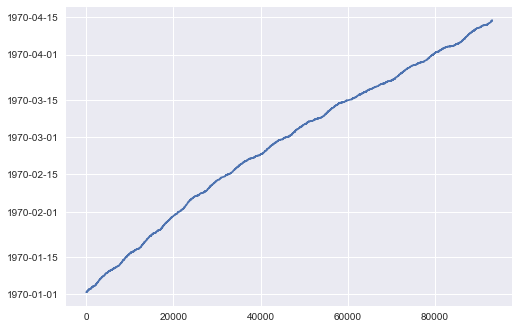

In [1575]:
# checking if there was an outlier in the timestamps
df_log.login_time.plot(kind='line')
plt.show


In [1576]:
#We will add a temporary column to aggregate on:
df_log['count'] = 1
df_log.head()

,login_time,count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [1577]:
df_log.login_time.dtypes

dtype('<M8[ns]')

In [1578]:
#Setting login_time as index. 
df_log = df_log.set_index(pd.DatetimeIndex(df_log['login_time']))
#drop the login_time column
df_log.drop('login_time',axis=1,inplace=True)


In [1579]:
df_log.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


<AxesSubplot:xlabel='login_time'>

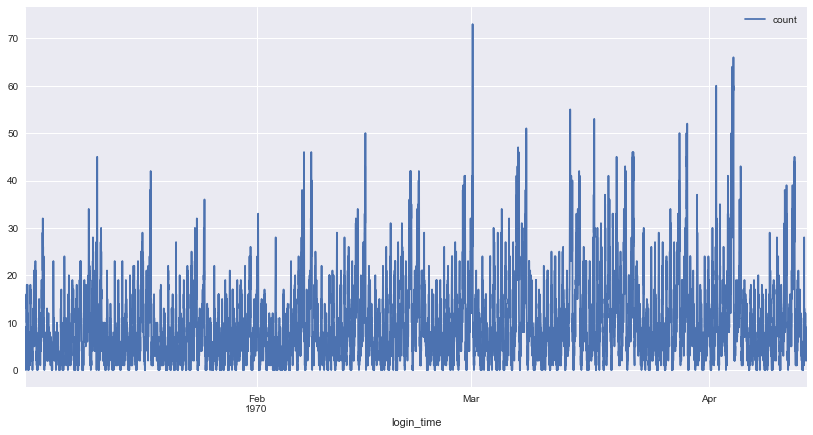

In [1580]:
df_15 = df_log.resample('15min').sum()
df_15.plot(kind='line',figsize=(14,7))

* We observe that the login number is higher at certain times of the day and also in Spring. The logins seem to increase as time progresses.

In [1581]:
df_15.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


The average login is 7 per 15 minutes. (%50) 

In [1582]:
# creating additional columns to observe daily cycles

df_15 = df_15.assign(month_day=df_15.index.day)
df_15 = df_15.assign(weekday=df_15.index.weekday)
df_15 = df_15.assign(month = df_15.index.month)
df_15.head()

,count,month_day,weekday,month
login_time,,,,
1970-01-01 20:00:00,2,1,3,1
1970-01-01 20:15:00,6,1,3,1
1970-01-01 20:30:00,9,1,3,1
1970-01-01 20:45:00,7,1,3,1
1970-01-01 21:00:00,1,1,3,1


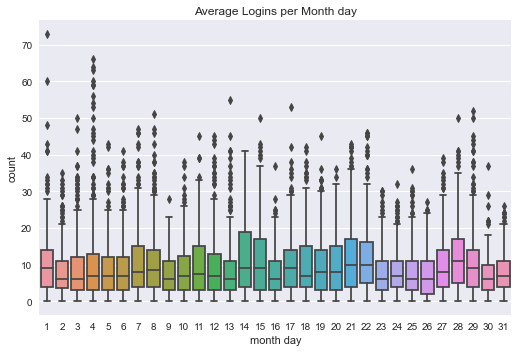

In [1583]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.2)
sns.boxplot(x="month_day", y="count", data=df_15)
plt.xlabel('month day')
plt.title('Average Logins per Month day')
sns.despine(left=True)
plt.tight_layout()


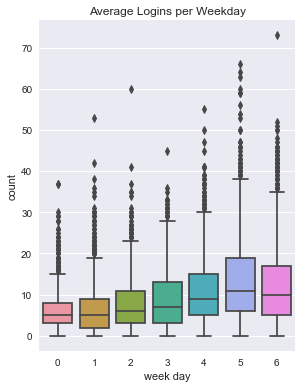

In [1584]:
plt.subplot(1,2,2)
sns.boxplot(x="weekday", y="count", data=df_15)
plt.xlabel('week day')
plt.title('Average Logins per Weekday')
sns.despine(left=True)
plt.tight_layout();

The 15 minute interval with the highest number of logins was on a Sunday but Saturday has the highest number overall. The weekends are when there are most logins.

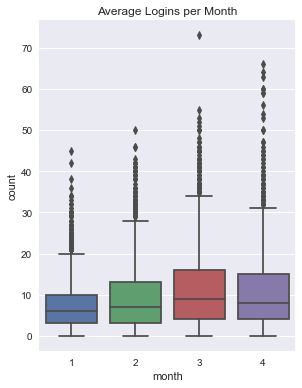

In [1585]:
plt.subplot(1,2,2)
sns.boxplot(x="month", y="count", data=df_15)
plt.xlabel('month')
plt.title('Average Logins per Month')
sns.despine(left=True)
plt.tight_layout();

March has 15 minute interval that has the highest number of logins and has the higheset number logins over all. It is also possible that that peak number for March is an outlier.


It would be helpful to see the daily frequencey with resampling method now:

In [1586]:
df_log.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


Text(0, 0.5, 'count')

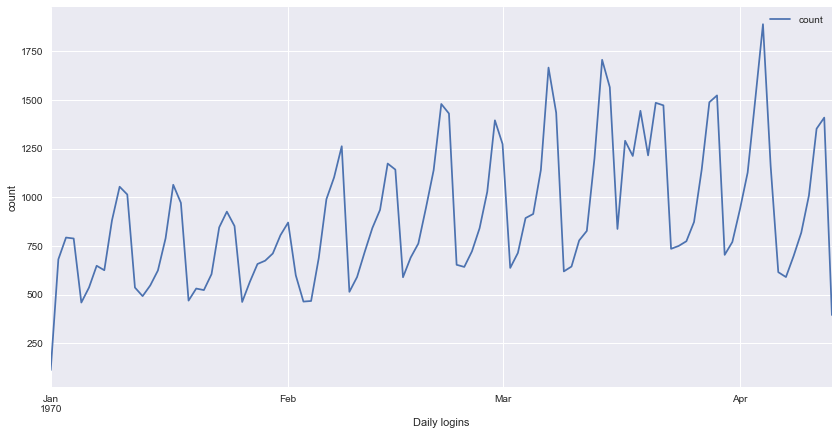

In [1587]:
#resample to see the daily logins
df_day = df_log.resample('1D').sum()
df_day.plot(kind='line',figsize=(14,7))
plt.xlabel('Daily logins')
plt.ylabel('count')


We can clearly see that as winter comes to an end there is a gradual increase in the logins.

## Part 2 ‐ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1) What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2) Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a) how you will implement the experiment
b) what statistical test(s) you will conduct to verify the significance of the
observation
c) how you would interpret the results and provide recommendations to the city
operations team along with any caveats.
Note: The two cities of Gotham and Metropolis are not in the provided dataset; however, you do
not need this information to answer Part 2.

In this experiment, I would be concerned if this deal would be cost-effective on the account of Ultimate's decision of toll reimbursement. I would need to understand the distribution of Ultimate partners into two cities (which city has the bigger population), how many miles each partner go in average (how much would they make per ride(, and how much traffic is going on. Assuming that we can access data through their smart phone apps, here are the steps I'd take. Since the numbers of two cities are similar in the weekend,one option would be focusing on the data for the weekend to look at the data from both cities as a merged dataset. However, looking at each city's results separately during the week would also make sense. Since it makes sense to send Metropolis partners to Gotham (busier at night time) at weeknights and Gotham partners to Metropolis (busier at daytime) at weekdays.

1)I would pick a random sample size of partners (100). The ratio of partners of two cities would be determined by the overall ratio between the total number of partners in Gotham and Metropolis. 

2)Then I would observe them in two workdays in two consecutive weeks (ie Wednesday). First wednesday, without really I would observe their total miles (and earnings) made during their rides and the number of their rides the in two cities. I would notify these 100 partners about the toll policy and then the second wednesday, I would collect the same data to see if this policy increased the number of rides in each cities. I would use bootstrapping testing to apply the results to the big picture.
While experimenting I would pay attention that both wednesdays are not part of any holiday and they are both during school season or school break. 

I would compare the results of both wednesdays to see if there was a bigger earning and if Ultimate was able to make more profit despite being obliged to pay the tolls. 

## Part 3 ‐ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long term rider retention (again, a few sentences will suffice).


In [1588]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import AdaBoostRegressor
from sklearn import model_selection
from sklearn.linear_model import HuberRegressor, LinearRegression

In [1589]:
## Opening Json file
file = 'ultimate_data_challenge.json'
f = open(file)
ultimate = json.loads(f.read())
dfu = pd.DataFrame(ultimate)

#closing file
f.close()

In [1590]:
dfu.head()


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [1591]:
dfu.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [1592]:
dfu.shape

(50000, 12)

In [1593]:
print(dfu.isna().sum())

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64


In [1594]:
#converting date columns to datetime type
dfu['last_trip_date'] = pd.to_datetime(dfu['last_trip_date'])
dfu['signup_date'] = pd.to_datetime(dfu['signup_date'])
dfu.dtypes

city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                             object
surge_pct                        float64
ultimate_black_user                 bool
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
dtype: object

In [1595]:
#creating retained column based on the difference between current date and last day the driver had a trip.
today = dfu['last_trip_date'].max()
print(today)

2014-07-01 00:00:00


In [1596]:
# find if the driver was retained/active
dfu['retained'] = dfu['last_trip_date'].apply(lambda x: 0 if (today-x).days>30 else 1)
dfu.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


## Cleaning

The NaN values for phone might not be so important since the phone type might not be a big drive in determining a driver's retention. However let's see if there is any correlation between phone types and trips made in last 30 days.

In [1597]:
dfu.phone.unique()

array(['iPhone', 'Android', None], dtype=object)

There are only 3 unique values for 'phone' column. No differences exist in the wordings, which is good.

In [1598]:
android =dfu.loc[dfu ["phone"] == 'Android']
(android['retained'].value_counts() / android['retained'].count())*100


0    79.057383
1    20.942617
Name: retained, dtype: float64

In [1599]:
iphone =dfu.loc[dfu ["phone"] == 'iPhone']

(iphone['retained'].value_counts() / iphone_df['retained'].count())*100


0    55.106703
1    44.893297
Name: retained, dtype: float64

Android users seem to give up using the app 25 percent more than iPhone users.

In [1600]:
dfu = dfu[dfu.phone.notnull()]


In [1601]:
dfu.phone.unique()

array(['iPhone', 'Android'], dtype=object)

We might need average ratings by drivers and for drivers because we should replace the NaN values with the average numbers,

In [1602]:
dfu['avg_rating_of_driver'].describe()


count    41578.000000
mean         4.601467
std          0.617377
min          1.000000
25%          4.300000
50%          4.900000
75%          5.000000
max          5.000000
Name: avg_rating_of_driver, dtype: float64

In [1603]:
dfu['avg_rating_by_driver'].describe()

count    49406.000000
mean         4.777861
std          0.447114
min          1.000000
25%          4.700000
50%          5.000000
75%          5.000000
max          5.000000
Name: avg_rating_by_driver, dtype: float64

In [1604]:
#creating a cleaner dataframe
df = dfu
df['avg_rating_of_driver'] = dfu.avg_rating_of_driver.fillna(4.6)
df['avg_rating_by_driver'] = dfu.avg_rating_by_driver.fillna(4.8)


In [1605]:
df.avg_rating_of_driver.unique()

array([4.7, 5. , 4.3, 4.6, 4.4, 3.5, 4.5, 4. , 3.9, 4.9, 4.8, 2.5, 3.7,
       1. , 4.1, 4.2, 3. , 3.8, 2. , 2.7, 3.3, 2.8, 3.6, 3.4, 3.2, 2.6,
       3.1, 2.9, 1.7, 1.8, 1.5, 2.3, 1.9, 2.1, 2.4, 1.6, 2.2])

In [1606]:
df.avg_rating_by_driver.unique()

array([5. , 4.9, 4. , 3. , 4.8, 4.7, 4.5, 4.2, 4.4, 4.6, 3.7, 4.3, 3.5,
       2. , 3.8, 2.5, 4.1, 3.9, 1. , 3.3, 3.4, 3.6, 3.2, 2.3, 2.8, 1.5,
       2.7])

In [1607]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [1608]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,retained
count,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000
mean,2.277256,4.601230,1.074991,8.875314,60.883832,5.785418,4.777949,0.376401
std,3.793300,0.565228,0.222666,19.989018,37.086239,5.669709,0.446223,0.484487
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,4.500000,1.000000,0.000000,33.300000,2.420000,4.700000,0.000000
50%,1.000000,4.700000,1.000000,0.000000,66.700000,3.880000,5.000000,0.000000
75%,3.000000,5.000000,1.050000,8.700000,100.000000,6.930000,5.000000,1.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000,1.000000


There are outliers in 'trips_in_first_30_days', 'surge_pct'and 'avg_dist.' We should drop those columns.

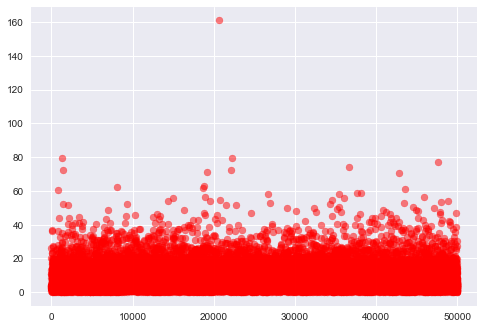

In [1609]:

plt.scatter(df.index, df['avg_dist'], c='red', alpha=0.5)
plt.show()



Actually there is one outlier in 'avg_dist' column. So we will take it off.

In [1610]:
df['avg_dist'].describe()

count    49604.000000
mean         5.785418
std          5.669709
min          0.000000
25%          2.420000
50%          3.880000
75%          6.930000
max        160.960000
Name: avg_dist, dtype: float64

In [1611]:
#finding 2 largest numbers
df['avg_dist'].max()

160.96

In [1612]:
#dropping the 2 rows from avg_dist column
v1 =[160.96]
df = df[df.avg_dist.isin(v1) == False]
df['avg_dist'].describe()

count    49603.000000
mean         5.782290
std          5.626792
min          0.000000
25%          2.420000
50%          3.880000
75%          6.930000
max         79.690000
Name: avg_dist, dtype: float64

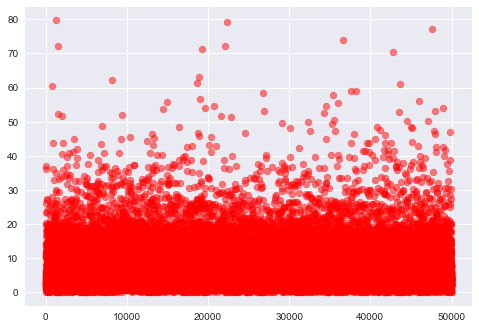

In [1613]:
plt.scatter(df.index, df['avg_dist'], c='red', alpha=0.5)
plt.show()

The max number is still very high but there are many numbers in that range so I'll keep them. 

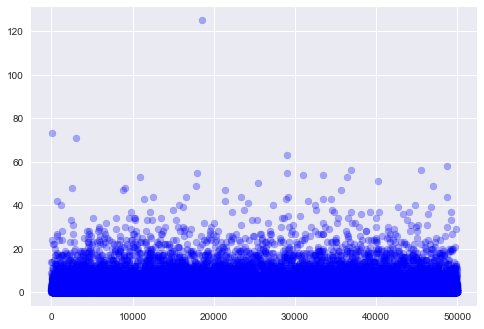

count    49603.000000
mean         2.277302
std          3.793325
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        125.000000
Name: trips_in_first_30_days, dtype: float64

In [1614]:
#replotting trips in first 30 days column to see how many outliers are there.
plt.scatter(df.index, df['trips_in_first_30_days'], c='blue', alpha=0.3)
plt.show()
df['trips_in_first_30_days'].describe()


In [1615]:
df['trips_in_first_30_days'].max()

125

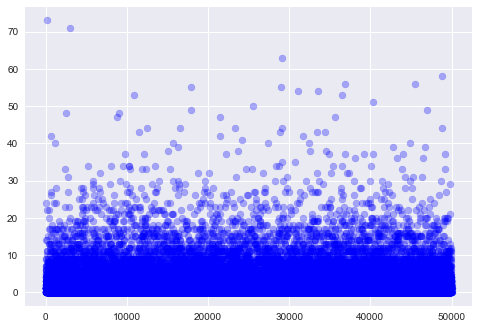

In [1616]:
# we will take off the row with 125 trips which is an outlier.
v2 =[125]
df = df[df.trips_in_first_30_days.isin(v2) == False]
df['trips_in_first_30_days'].describe()

plt.scatter(df.index, df['trips_in_first_30_days'], c='blue', alpha=0.3)
plt.show()


The maximum number is still very big compared to the mean but there are many numbers in that range so I'll keep them.

In [1617]:
df.dtypes

city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                             object
surge_pct                        float64
ultimate_black_user                 bool
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
retained                           int64
dtype: object

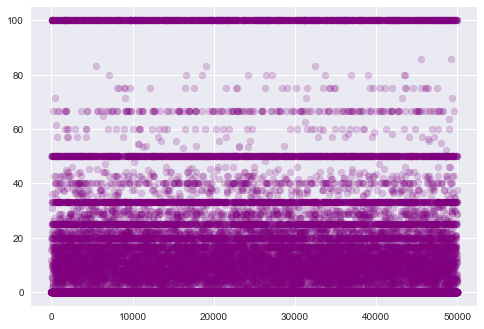

count    49602.000000
mean         8.875382
std         19.989366
min          0.000000
25%          0.000000
50%          0.000000
75%          8.700000
max        100.000000
Name: surge_pct, dtype: float64

In [1618]:
plt.scatter(df.index, df['surge_pct'], c='purple', alpha=0.2)
plt.show()
df['surge_pct'].describe()



I won't take off the maximum number since there are plenty numbers that are 100.

## EDA

In [1619]:
##Visualize Retained Driver numbers
percentage= (df['retained'].value_counts() / df['retained'].count())*100

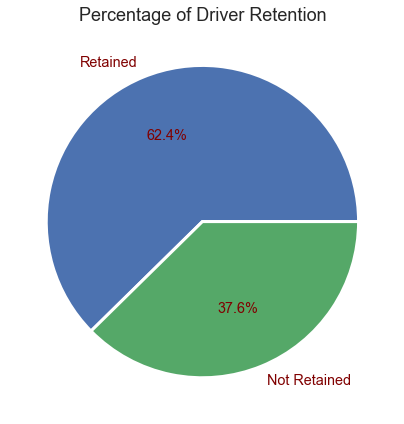

In [1620]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(percentage, labels=['Retained', 'Not Retained'], 
       autopct='%.1f%%', 
       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large', 'color':'maroon'})
ax.set_title('Percentage of Driver Retention', fontsize=18)

plt.tight_layout()

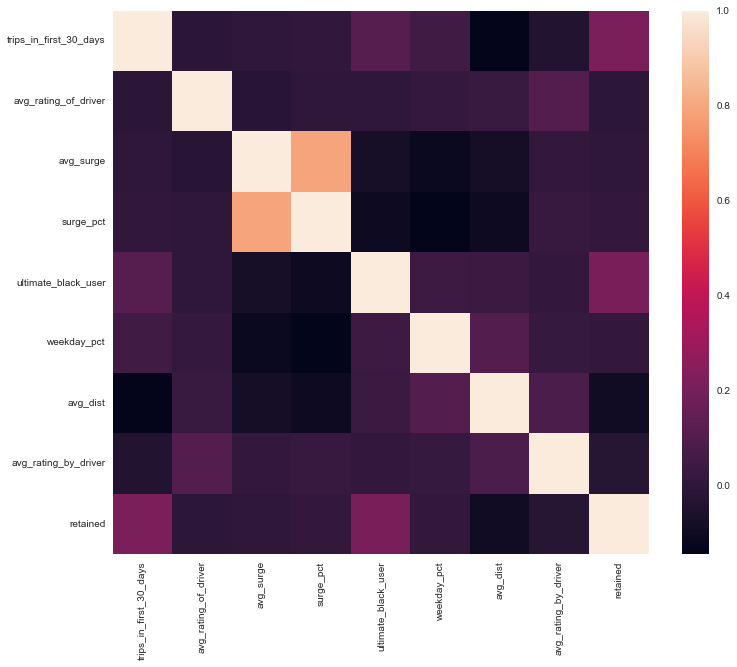

In [1621]:
# let's do a heatmap to see the correlations

plt.subplots(figsize=(12,10))
sns.heatmap(df.corr());

Average ratings by and of drivers as well as the average distance seem to affect whether a driver is active or not.

<AxesSubplot:xlabel='retained', ylabel='avg_dist'>

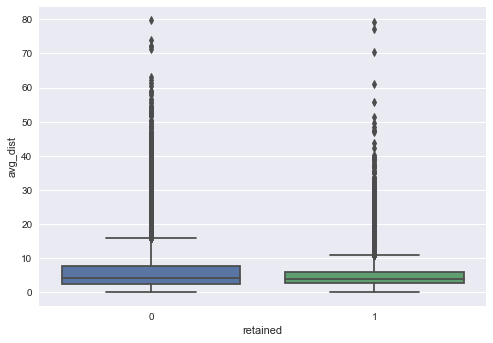

In [1622]:
#visualizing avg_distance for retained and not retained.
sns.boxplot(data=df,x='retained',y='avg_dist')

Like we speculated drivers who drive more clearly tend to remain less active/retained.

avg_rating_of_driver          
                         mean       std
retained                               
0                    4.605809  0.591545
1                    4.593679  0.518595

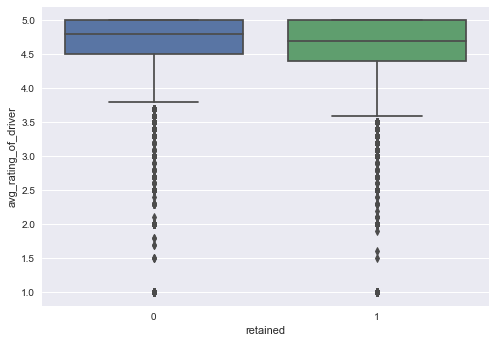

In [1670]:
sns.boxplot(data=df,x='retained',y='avg_rating_of_driver')

pd.pivot_table(df,index='retained',aggfunc={'avg_rating_of_driver':['mean', 'std']})


numbers are quite similar. It's hard to make a solid statement.

avg_rating_by_driver          
                         mean       std
retained                               
0                    4.787104  0.503848
1                    4.762778  0.328728

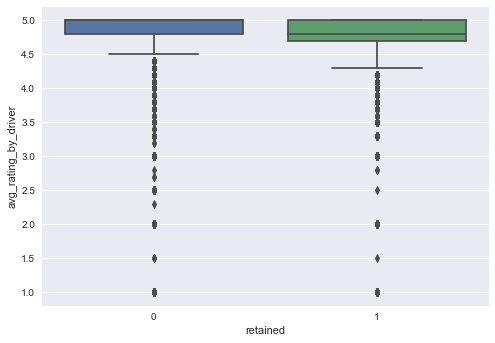

In [1624]:
sns.boxplot(data=df,x='retained',y='avg_rating_by_driver')

pd.pivot_table(df,index='retained',aggfunc={'avg_rating_by_driver':['mean', 'std']})


numbers are quite similar here too but overall more engaged drivers seem to remain active more often.

<AxesSubplot:xlabel='retained', ylabel='trips_in_first_30_days'>

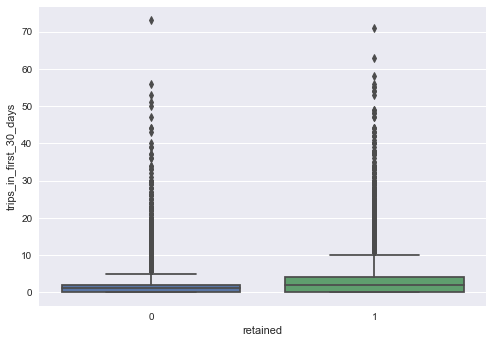

In [1625]:
sns.boxplot(data=df,x='retained',y='trips_in_first_30_days')


In [1626]:
pd.pivot_table(df,index='retained',aggfunc={'trips_in_first_30_days':['mean']})


,trips_in_first_30_days
,mean
retained,
0,1.657033
1,3.298463


 People involved in first 30 days are almost twice more likely to stay active

weekday_pct           
                mean        std
retained                       
0          60.605952  40.983689
1          61.339495  29.512431

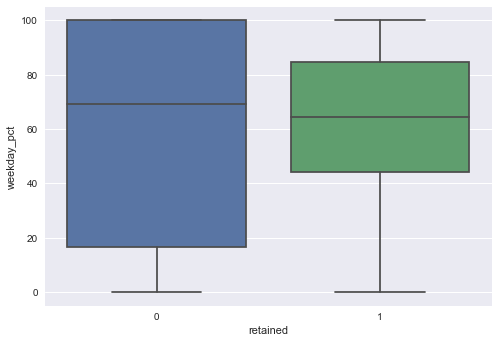

In [1834]:
sns.boxplot(data=df,x='retained',y='weekday_pct')
pd.pivot_table(df,index='retained',aggfunc={'weekday_pct':['mean', 'std']})


Drivers who work more often during the week remained less active.

The plot shows that average distance of drivers who became inactive are much more than the active drivers. So there is a negative impact.

## Building Predictive Model

In [1631]:
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler,QuantileTransformer
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [1632]:
#the rider that I will work on is below.
df[5:6]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
5,Winterfell,2,2014-01-09,3.5,1.0,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0,1


In [1633]:
chosen = df[df.index == 5 ]
chosen.T

,5
city,Winterfell
trips_in_first_30_days,2
signup_date,2014-01-09 00:00:00
avg_rating_of_driver,3.5
avg_surge,1.0
last_trip_date,2014-06-06 00:00:00
phone,iPhone
surge_pct,0.0
ultimate_black_user,True
weekday_pct,100.0


In [1634]:
df.shape

(49602, 13)

In [1635]:
df = df[df.index != 5 ]

In [1636]:
df.shape

(49601, 13)

In [1637]:
# Creating dummies for categorical features
cat_features = pd.get_dummies(df, columns=['city','phone','ultimate_black_user'])
cat_features.head()


,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,46.2,3.67,5.0,1,0,1,0,0,1,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,50.0,8.26,5.0,0,1,0,0,1,0,1,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,100.0,0.77,5.0,0,1,0,0,0,1,1,0
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,80.0,2.36,4.9,1,0,1,0,0,1,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,82.4,3.13,4.9,0,0,0,1,1,0,1,0


TypeError: float() argument must be a string or a number, not 'Timestamp'

In [1781]:
#setting result column
result = cat_features['retained']
#dropping unnecessary columns
df1 = cat_features.drop(['last_trip_date','signup_date'],axis=1)
df1.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,4,4.7,1.10,15.4,46.2,3.67,5.0,0,1,0,0,1,0,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,1,0,0,1,0,1,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,1,0,0,0,1,1,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,0,1,0,0,1,0,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,0,1,1,0,1,0


(49601, 14)

## Train / Split Data

## Scale the Data

In [1677]:
#scale data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df1)
scaled_df = pd.DataFrame(scaled_df, columns= df1.columns)
scaled_df.columns

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver',
       'retained', 'city_Astapor', 'city_King's Landing', 'city_Winterfell',
       'phone_Android', 'phone_iPhone', 'ultimate_black_user_False',
       'ultimate_black_user_True'],
      dtype='object')

In [1681]:
len(scaled_df) * .8, len(scaled_df) * .2

(39680.8, 9920.2)

In [1794]:
# splitting into test and train data
X_train, X_test, y_train, y_test = train_test_split(scaled_df.drop (columns='retained'),
                                                   result, test_size=0.2, 
                                                    random_state=47)

In [1795]:
X_train.shape, X_test.shape

((39680, 14), (9921, 14))

shapes look right.

Let's try DecisionTreeClassifier and RandomForest Classier

In [1686]:
start_time = dt.now()
random = RandomForestClassifier(n_estimators=1000)
random.fit(X_train,y_train)
y_pred = random.predict(X_test)
score1 = random.score(X_test,y_test)
end_time = dt.now()
print('Running time: {} and Score {}'.format(end_time - start_time, score1))

Running time: 0:00:30.026700 and Score 0.7534522729563552


In [1685]:
start_time = dt.now()
decision = DecisionTreeClassifier()
decision.fit(X_train,y_train)
y_pred = decision.predict(X_test)
score2= decision.score(X_test,y_test)
end_time = dt.now()
print('Running time: {} and Score {}'.format(end_time - start_time, score2 ))

Running time: 0:00:00.150510 and Score 0.7081947384336257


In [1684]:
start_time = dt.now()
gaussian = GaussianNB()
gaussian.fit(X_train,y_train)
y_pred = gaussian.predict(X_test)
score3= gaussian.score(X_test,y_test)
end_time = dt.now()
print('Running time: {} and Score {}'.format(end_time - start_time, score3 ))

Running time: 0:00:00.019532 and Score 0.7156536639451668


In [1683]:
start_time = dt.now()
logistic = LogisticRegression()
logistic.fit(X_train,y_train)
y_pred = logistic.predict(X_test)
score4= logistic.score(X_test,y_test)
end_time = dt.now()
print('Running time: {} and Score {}'.format(end_time - start_time, score4 ))

Running time: 0:00:00.069947 and Score 0.7190807378288478


In [1682]:
start_time = dt.now()

gradient = GradientBoostingClassifier()
gradient.fit(X_train,y_train)
y_pred = gradient.predict(X_test)
score5= gradient.score(X_test,y_test)
end_time = dt.now()
print('Running time: {} and Score {}'.format(end_time - start_time, score5 ))

Running time: 0:00:02.788751 and Score 0.788126196955952


##Gradient Boosting Classifier has the best fastest score.


In [1796]:
print(cross_val_score(gradient,X_test,np.ravel(y_test),cv=5))
print('Mean of CVs:',np.mean(cross_val_score(gradient,X_test,np.ravel(y_test),cv=5)))

[0.77732997 0.78528226 0.77923387 0.79133065 0.79032258]
Mean of CVs: 0.7846998659299587


In [1697]:

scaled_df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,0.459661,0.174723,0.112306,0.326396,-0.395890,-0.375396,0.497626,1.287248,-0.703208,1.981935,-0.934538,-0.659078,0.659078,-1.290460,1.290460
1,-0.606117,0.705495,-0.336789,-0.444015,-0.293426,0.440346,0.497626,-0.776851,1.422055,-0.504557,-0.934538,1.517271,-1.517271,0.774917,-0.774917
2,0.193217,-0.532973,-0.336789,-0.444015,1.054787,-0.890788,0.497626,-0.776851,1.422055,-0.504557,-0.934538,-0.659078,0.659078,0.774917,-0.774917
3,1.791884,-0.002201,0.291944,0.556519,0.515502,-0.608211,0.273527,1.287248,-0.703208,1.981935,-0.934538,-0.659078,0.659078,-1.290460,1.290460
4,3.124107,-0.356049,0.516491,0.146300,0.580216,-0.471365,0.273527,-0.776851,-0.703208,-0.504557,1.070047,1.517271,-1.517271,0.774917,-0.774917


In [1822]:
df_important = df1.iloc[:3]
df_important.iloc[:1] = gradient.feature_importances_
df_important.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,0.042297,0.010111,0.005721,0.166118,0.154367,0.016911,0.255143,0.025219,0.165863,0.000000,0.036366,0.048992,0.030200,0.042692
1,0.080145,0.080720,0.066902,0.079022,0.133079,0.302643,0.112328,0.015824,0.048635,0.011076,0.018629,0.017528,0.017035,0.016434
2,3.000000,4.300000,1.000000,0.000000,100.000000,0.770000,5.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000


In [1823]:
df_important.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,0.042297,0.010111,0.005721,0.166118,0.154367,0.016911,0.255143,0.025219,0.165863,0.000000,0.036366,0.048992,0.030200,0.042692
1,0.080145,0.080720,0.066902,0.079022,0.133079,0.302643,0.112328,0.015824,0.048635,0.011076,0.018629,0.017528,0.017035,0.016434
2,3.000000,4.300000,1.000000,0.000000,100.000000,0.770000,5.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000


In [1824]:
# feature importances according to RandomForest Classifier
df_important.iloc[1:2] = random.feature_importances_
df_important.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,0.042297,0.010111,0.005721,0.166118,0.154367,0.016911,0.255143,0.025219,0.165863,0.000000,0.036366,0.048992,0.030200,0.042692
1,0.080145,0.080720,0.066902,0.079022,0.133079,0.302643,0.112328,0.015824,0.048635,0.011076,0.018629,0.017528,0.017035,0.016434
2,3.000000,4.300000,1.000000,0.000000,100.000000,0.770000,5.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000


In [1825]:
print (df_important.iloc[:1].T.sort_values(by = 0, ascending = False))

                                  0
avg_rating_by_driver       0.255143
surge_pct                  0.166118
city_King's Landing        0.165863
weekday_pct                0.154367
phone_iPhone               0.048992
ultimate_black_user_True   0.042692
trips_in_first_30_days     0.042297
phone_Android              0.036366
ultimate_black_user_False  0.030200
city_Astapor               0.025219
avg_dist                   0.016911
avg_rating_of_driver       0.010111
avg_surge                  0.005721
city_Winterfell            0.000000


In [1826]:
print (df_important.iloc[1:2].T.sort_values(by = 1, ascending = False))

                                  1
avg_dist                   0.302643
weekday_pct                0.133079
avg_rating_by_driver       0.112328
avg_rating_of_driver       0.080720
trips_in_first_30_days     0.080145
surge_pct                  0.079022
avg_surge                  0.066902
city_King's Landing        0.048635
phone_Android              0.018629
phone_iPhone               0.017528
ultimate_black_user_False  0.017035
ultimate_black_user_True   0.016434
city_Astapor               0.015824
city_Winterfell            0.011076


In [1827]:
print(cross_val_score(random,X_test,np.ravel(y_test),cv=5))
print('Mean of CVs:',np.mean(cross_val_score(random,X_test,np.ravel(y_test),cv=5)))

[0.76120907 0.76864919 0.75604839 0.76864919 0.76360887]
Mean of CVs: 0.7637334443812465


In [1828]:
#checking Logistic Regression
logitistic = LogisticRegression(solver='lbfgs')
#set parameter grid
param_grid = {'C':np.arange(0.5,5.1,0.1)}
#igridsearch and fit 
grid = GridSearchCV(logistic,param_grid,cv=5)
grid.fit(X_train,np.ravel(y_train))

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])})

In [1815]:
grid.best_estimator_.C


0.5

In [1839]:
#finding coefficients 
logistic_co = LogisticRegression(C=grid.best_estimator_.C)
logistic_co.fit(X_train,y_train)

df_important.iloc[2:3] = logistic_co.coef_[0]
print (df_important.iloc[2:3].T.sort_values(by = 2, ascending = False))


                                  2
trips_in_first_30_days     0.443843
city_King's Landing        0.435015
phone_iPhone               0.245060
ultimate_black_user_True   0.214613
surge_pct                  0.070774
weekday_pct               -0.002024
avg_surge                 -0.032515
avg_rating_of_driver      -0.036127
avg_rating_by_driver      -0.066010
city_Winterfell           -0.067889
avg_dist                  -0.205281
ultimate_black_user_False -0.214613
phone_Android             -0.245060
city_Astapor              -0.299841


/var/folders/1p/kr0kg7ld50j8p30pxnp388kh0000gn/T/ipykernel_80082/4059634561.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_important.iloc[2:3] = logistic_co.coef_[0]


,0,1,2
trips_in_first_30_days,0.042297,0.080145,0.443843
avg_rating_of_driver,0.010111,0.080720,-0.036127
avg_surge,0.005721,0.066902,-0.032515
surge_pct,0.166118,0.079022,0.070774
weekday_pct,0.154367,0.133079,-0.002024


It seems that using RandomForestClassier works the best since it is consistent with our earlier predictions on feature importances. 'avg_dist', 'weekday_pct', 'avg_rating_by_driver' and 'avg_rating_of_driver' are the four important features.



#### CONCLUSION

Based on the trips in the first 30 days, and other important features we can state that

avg_dist - Average Distance is more likely to have negative effect in drivers' active status so drivers should be encouraged to drive lss miles.

weekday_pct - If Weekday Percentage is high then drivers tend to become inactive more. So weekend rides should be promoted.

avg_rating_by_driver - if a driver rates they tend to stay. However, this might not be a cause-effect situation since it is very possible that active drivers by nature are engaged people, so they do rate their customers as enthusiastic drivers. 

trips_in_first_30_days - Over more trips in the 30 days make the drivers more likely to stay active. If we had more data about this 30 days, we could use predictive models that would utilitize timeseries and predict the results for the 6th month better.